# Data and Features


Id - an Id that represents a (Store, Date) duple within the test set

Store - a unique Id for each store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open

StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

StoreType - differentiates between 4 different store models: a, b, c, d

Assortment - describes an assortment level: a = basic, b = extra, c = extended.


CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the
time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 =
store is not participating, 1 = store is participating

Promo2Since[Year/Week] - describes the year and calendar week when the store
started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


# ** Logging **

In [1]:
import logging
# Configure the logging settings
logging.basicConfig(filename='logfile.log', level=logging.INFO, filemode='w', format='%(asctime)s - %(levelname)s - %(message)s - %(lineno)d')


In [2]:
#  Create a logger object
logger = logging.getLogger()
logger = logging.getLogger("my_logger")

logger.setLevel(logging.DEBUG)

In [3]:
# Creating and configuring handlers
file_handler = logging.FileHandler("app.log")
console_handler = logging.StreamHandler()

In [4]:
# Setting the log level for each handler
file_handler.setLevel(logging.ERROR)
console_handler.setLevel(logging.DEBUG)

In [5]:
# Creating a formatter
formatter = logging.Formatter("%(asctime)s - %(name)s - %(levelname)s - %(message)s")

# Setting the formatter for each handler
file_handler.setFormatter(formatter)
console_handler.setFormatter(formatter)

In [6]:
# Attaching the handlers to the logger
logger.addHandler(file_handler)
logger.addHandler(console_handler)

In [7]:
# Logging messages
logger.debug("This is a debug message")
logger.info("This is an info message")
logger.warning("This is a warning message")
logger.error("This is an error message")
logger.critical("This is a critical message")

2023-08-31 13:18:19,305 - my_logger - DEBUG - This is a debug message
2023-08-31 13:18:19,311 - my_logger - INFO - This is an info message
2023-08-31 13:18:19,314 - my_logger - WARNING - This is a warning message
2023-08-31 13:18:19,316 - my_logger - ERROR - This is an error message
2023-08-31 13:18:19,319 - my_logger - CRITICAL - This is a critical message


In [8]:
def my_function():
    logger.info('Starting my_function...')

    try:
        # Your code logic here
        result = 10 / 2
        logger.info('Result: %s', result)
    except Exception as e:
        logger.error('An error occurred: %s', str(e))
    finally:
        logger.info('Finished my_function.')


In [9]:
if __name__ == "__main__":
    # Your main code here
    logger.info('Program started.')
    my_function()
    logger.info('Program finished.')

2023-08-31 13:18:19,385 - my_logger - INFO - Program started.
2023-08-31 13:18:19,387 - my_logger - INFO - Starting my_function...
2023-08-31 13:18:19,390 - my_logger - INFO - Result: 5.0
2023-08-31 13:18:19,392 - my_logger - INFO - Finished my_function.
2023-08-31 13:18:19,394 - my_logger - INFO - Program finished.


# Task 1 - Exploration of customer purchasing behaviour

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [11]:
file_path = 'sample_submission.csv'

# Read the CSV file
sample = pd.read_csv(file_path)

In [12]:
sample.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [13]:
file_path1 = "store.csv"

# Read the CSV file
store = pd.read_csv(file_path1)

In [14]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [15]:
test_data=pd.read_csv("test.csv")

In [16]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [17]:
train_data=pd.read_csv('train.csv')

In [18]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


# Describe data


### Train


In [19]:
train_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [20]:
train_data.shape

(1017209, 9)

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


 In the train data there is no null values

In [22]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


* The dataset contains a total of 1,017,209 records .

* The average sales amount is approximately 5,773.82, and the standard deviation is around 3,849.93, suggesting a considerable variation in sales.


*The average number of customers is approximately 633.15, with a standard deviation of about 464.41.

* The store is open (Open = 1) around 83.01% of the time, and promotions (Promo = 1) are active about 38.15% of the time.

* School holidays (SchoolHoliday = 1) occur approximately 17.86% of the time.

# Test data

In [23]:
test_data.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [24]:
test_data.shape

(41088, 8)

In [25]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


No Null values  present in test dataset

In [26]:
test_data.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


* The dataset contains 41,088 records 
* The "DayOfWeek" column indicates that most of the records are from working days since the mean is close to 4 (Tuesday, the "DayOfWeek" represents the numerical values for the days of the week, with Monday being 1 and Sunday being 7, a mean value of 3.98 suggests that most of the records in the dataset are from working days.).

* The "Open" column indicates that the store is open (Open = 1) around 85.43% of the time, with a few missing values (non-null count is less than the total count).

* The "Promo" column indicates that promotions (Promo = 1) are active around 39.58% of the time.

* The "SchoolHoliday" column indicates that school holidays (SchoolHoliday = 1) occur around 44.35% of the time.

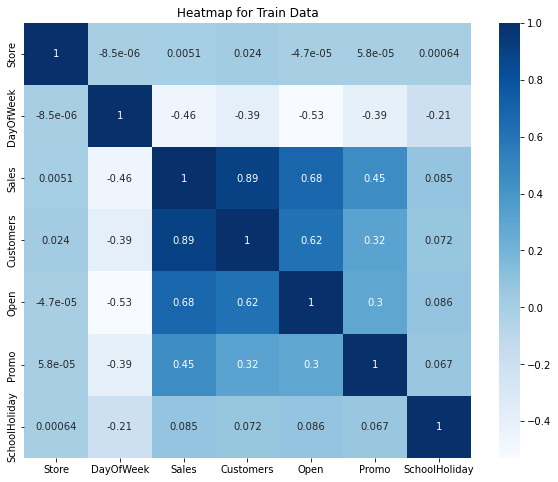

In [27]:
# heatmap for the train_data
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='Blues')
plt.title('Heatmap for Train Data')
plt.show()



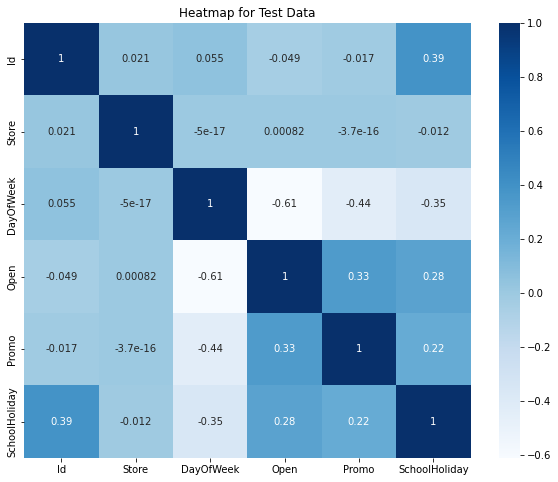

In [28]:
# heatmap for the test_data
plt.figure(figsize=(10, 8))
sns.heatmap(test_data.corr(), annot=True, cmap='Blues')
plt.title('Heatmap for Test Data')
plt.show()

In [29]:
train_data.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000


* The correlation coefficient between 'Store' and all other columns is close to zero, indicating weak or negligible linear relationships between 'Store' and the rest of the variables.

* The 'Sales' column has a strong positive correlation (approximately 0.895) with 'Customers', indicating that higher sales are associated with more customers.

* 'Sales' also has a positive correlation (approximately 0.679) with 'Open', suggesting that when the store is open, there tend to be higher sales.

* 'Sales' has a moderate positive correlation (approximately 0.452) with 'Promo', indicating that promotional activities may have a positive impact on sales.

* 'Sales' has a weak positive correlation (approximately 0.085) with 'SchoolHoliday', suggesting a minor impact of school holidays on sales.

* The 'DayOfWeek' column has moderate negative correlations with 'Sales', 'Customers', 'Open', and 'Promo'. This indicates that certain days of the week may have a negative impact on these variables.

In [30]:
test_data.corr()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
Id,1.000000,2.083250e-02,5.483047e-02,-0.049313,-1.690971e-02,0.387661
Store,0.020833,1.000000e+00,-5.032372e-17,0.000818,-3.682700e-16,-0.011757
DayOfWeek,0.054830,-5.032372e-17,1.000000e+00,-0.610797,-4.355177e-01,-0.352948
Open,-0.049313,8.182058e-04,-6.107974e-01,1.000000,3.325565e-01,0.278293
Promo,-0.016910,-3.682700e-16,-4.355177e-01,0.332556,1.000000e+00,0.219202
SchoolHoliday,0.387661,-1.175748e-02,-3.529484e-01,0.278293,2.192020e-01,1.000000


* The correlation between 'Id' and 'Store' is approximately 0.0208.

* The correlation between 'DayOfWeek' and 'Open' is approximately -0.6108.

* The correlation between 'Promo' and 'SchoolHoliday' is approximately 0.2192.

Positive values in the correlation matrix indicate a positive correlation, which means that when one variable increases, the other tends to increase as well. Negative values indicate a negative correlation, where one variable increases while the other decreases.

A correlation value close to 1 or -1 indicates a strong linear relationship between the two variables, while a value close to 0 indicates a weak or no linear relationship.

# Sample Data

In [31]:
sample.columns

Index(['Id', 'Sales'], dtype='object')

In [32]:
sample.shape

(41088, 2)

In [33]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      41088 non-null  int64
 1   Sales   41088 non-null  int64
dtypes: int64(2)
memory usage: 642.1 KB


 No null values present in sample dataset

In [34]:
sample.describe()

,Id,Sales
count,41088.000000,41088.0
mean,20544.500000,0.0
std,11861.228267,0.0
min,1.000000,0.0
25%,10272.750000,0.0
50%,20544.500000,0.0
75%,30816.250000,0.0
max,41088.000000,0.0


# Store dataset

In [35]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [36]:
store.shape

(1115, 10)

In [37]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [38]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [39]:
# separation of categorical and numerical columns
categorical_cols, numerical_cols = [], []

for i in store.columns:
    print("The datatype for {} is {}".format(i,store[i].dtypes))
    if store[i].dtypes == "object":
        mode_value = store[i].mode()[0]
        store[i].fillna(mode_value, inplace = True)
    elif store[i].dtypes != "object":
        mean_value = store[i].mean()
        store[i].fillna(mean_value, inplace = True)

The datatype for Store is int64
The datatype for StoreType is object
The datatype for Assortment is object
The datatype for CompetitionDistance is float64
The datatype for CompetitionOpenSinceMonth is float64
The datatype for CompetitionOpenSinceYear is float64
The datatype for Promo2 is int64
The datatype for Promo2SinceWeek is float64
The datatype for Promo2SinceYear is float64
The datatype for PromoInterval is object


In [40]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

# Task 1 -
Exploration of customer purchasing behaviour**

In [41]:
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [42]:
# Converting the date column to datetime format
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

# Determining the minimum and maximum dates in the dataset to find the range of years
min_date = train_data['Date'].min()
max_date = train_data['Date'].max()
years_span = max_date.year - min_date.year
print('train_min_date :',min_date)
print('train_max_date :',max_date)


train_min_date : 2013-01-01 00:00:00
train_max_date : 2015-07-31 00:00:00


In [43]:
# Sort the DataFrame by the date column in descending order (from latest to oldest)
train_data_sorted = train_data.sort_values(by='Date', ascending=False)

# Displaying the sorted DataFrame
print(train_data_sorted)

# Displaying the number of years the data spans
print(f"The data spans {years_span} years.")

         Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
742        743          5 2015-07-31   5085        501     1      1   
748        749          5 2015-07-31   6612        716     1      1   
747        748          5 2015-07-31   7481        578     1      1   
746        747          5 2015-07-31  10708        826     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1016471    377          2 2013-01-01      0          0     0      0   
1016472    378          2 2013-01-01      0          0     0      0   
1016473    379          2 2013-01-01      0          0     0      0   
1016474    380          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
0                  0              1  
742                0              1  
748                0             

In [44]:


# Determining the minimum and maximum dates in the dataset to find the range of years
min_date = test_data['Date'].min()
max_date = test_data['Date'].max()
years_span = max_date.year - min_date.year
print('test_min_date :',min_date)
print('test_max_date :',max_date)

test_min_date : 2015-08-01 00:00:00
test_max_date : 2015-09-17 00:00:00


In [45]:
# Sort the DataFrame by the date column in descending order (from latest to oldest)
test_data_sorted = test_data.sort_values(by='Date', ascending=False)

# Display the sorted DataFrame
print(test_data_sorted)

# Display the number of years the data spans
print(f"The data spans {years_span} years.")

          Id  Store  DayOfWeek       Date  Open  Promo StateHoliday  \
0          1      1          4 2015-09-17   1.0      1            0   
563      564    728          4 2015-09-17   1.0      1            0   
565      566    731          4 2015-09-17   1.0      1            0   
566      567    732          4 2015-09-17   1.0      1            0   
567      568    733          4 2015-09-17   1.0      1            0   
...      ...    ...        ...        ...   ...    ...          ...   
40520  40521    373          6 2015-08-01   1.0      0            0   
40521  40522    377          6 2015-08-01   1.0      0            0   
40522  40523    378          6 2015-08-01   1.0      0            0   
40523  40524    379          6 2015-08-01   1.0      0            0   
41087  41088   1115          6 2015-08-01   1.0      0            0   

       SchoolHoliday  
0                  0  
563                0  
565                0  
566                0  
567                0  
...      

The dataset contains two parts: "train_data" and "test_data." Both datasets have a 'Date' column, which has been converted to the datetime format.

For "train_data":

The data spans from January 1, 2013, to July 31, 2015, covering a period of 2 years. The dataset has 1,017,209 rows and 9 columns, including 'Store,' 'DayOfWeek,' 'Sales,' 'Customers,' 'Open,' 'Promo,' 'StateHoliday,' and 'SchoolHoliday.' The data is sorted in descending order based on the 'Date' column.

For "test_data":

The data spans from August 1, 2015, to September 17, 2015, covering a short period of 1 month and 17 days. The dataset has 41,088 rows and 8 columns, including 'Id,' 'Store,' 'DayOfWeek,' 'Open,' 'Promo,' 'StateHoliday,' and 'SchoolHoliday.' The data is sorted in descending order based on the 'Date' column.
It's important to note that the "test_data" only covers a small period compared to the "train_data," which spans over 2 years. Additionally, it seems that the "test_data" does not have the 'Sales' and 'Customers' columns, which are likely the target variables for prediction in a supervised machine learning scenario.

In [46]:
# Convert the 'Date' column to datetime format
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Group the data by 'Date' and calculate the total sales for each date
sales_per_date = train_data.groupby('Date')['Sales'].sum()

# Display the total sales per date
print(sales_per_date)

Date
2013-01-01       97235
2013-01-02     6949829
2013-01-03     6347820
2013-01-04     6638954
2013-01-05     5951593
                ...   
2015-07-27    10707292
2015-07-28     9115073
2015-07-29     8499962
2015-07-30     8798854
2015-07-31    10109742
Name: Sales, Length: 942, dtype: int64


In [47]:
# Extract 'Date', 'Sales', and 'Customers' columns
date_sales_customers = train_data[['Date', 'Sales', 'Customers']]

# Display the extracted data
print(date_sales_customers)

              Date  Sales  Customers
0       2015-07-31   5263        555
1       2015-07-31   6064        625
2       2015-07-31   8314        821
3       2015-07-31  13995       1498
4       2015-07-31   4822        559
...            ...    ...        ...
1017204 2013-01-01      0          0
1017205 2013-01-01      0          0
1017206 2013-01-01      0          0
1017207 2013-01-01      0          0
1017208 2013-01-01      0          0

[1017209 rows x 3 columns]


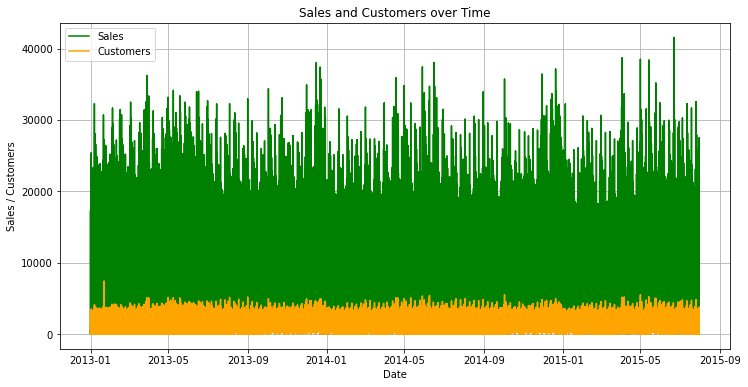

In [48]:
date_sales_customers.set_index('Date', inplace=True)

# line plot for 'Sales' and 'Customers'
plt.figure(figsize=(12, 6))
plt.plot(date_sales_customers.index, date_sales_customers['Sales'], label='Sales', color='green')
plt.plot(date_sales_customers.index, date_sales_customers['Customers'], label='Customers', color='orange')
plt.xlabel('Date')
plt.ylabel('Sales / Customers')
plt.title('Sales and Customers over Time')
plt.legend()
plt.grid(True)
plt.show()

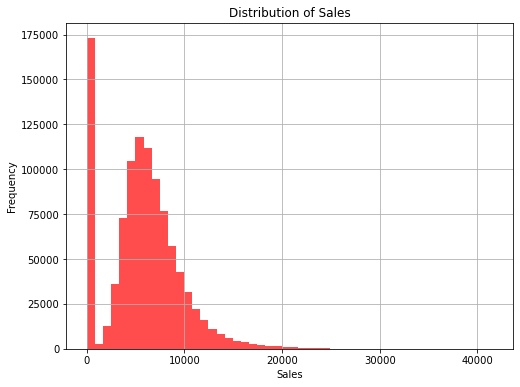

In [49]:
#  histogram for 'Sales'
plt.figure(figsize=(8, 6))
plt.hist(train_data['Sales'], bins=50, color='red', alpha=0.7)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.grid(True)
plt.show()

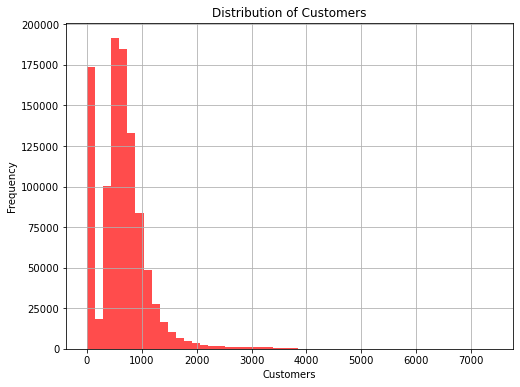

In [50]:
# Histogram for customers
plt.figure(figsize=(8, 6))
plt.hist(train_data['Customers'], bins=50, color='red', alpha=0.7)
plt.xlabel('Customers')
plt.ylabel('Frequency')
plt.title('Distribution of Customers')
plt.grid(True)
plt.show()

In [51]:
# the average sales for each category of 'StateHoliday' and 'SchoolHoliday'
average_sales_state_holiday = train_data.groupby('StateHoliday')['Sales'].mean()
average_sales_school_holiday = train_data.groupby('SchoolHoliday')['Sales'].mean()


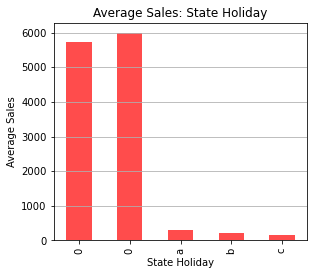

In [52]:
# bar plots to visualize the average sales based on 'StateHoliday' and 'SchoolHoliday'
plt.figure(figsize=(10, 4))

# Plot for StateHoliday
plt.subplot(1, 2, 1)
average_sales_state_holiday.plot(kind='bar', color='red', alpha=0.7)
plt.xlabel('State Holiday')
plt.ylabel('Average Sales')
plt.title('Average Sales: State Holiday')
plt.grid(axis='y')


a = public holiday, b = Easter holiday, c = Christmas, 0 = None

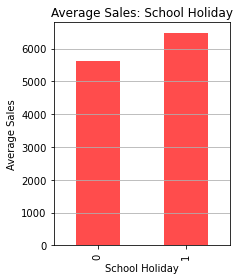

In [53]:
# Plot for SchoolHoliday
plt.subplot(1, 2, 2)
average_sales_school_holiday.plot(kind='bar', color='red', alpha=0.7)
plt.xlabel('School Holiday')
plt.ylabel('Average Sales')
plt.title('Average Sales: School Holiday')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [54]:
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [55]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [56]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41077 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  object        
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.5+ MB


In [57]:
##Convert 'Date' column to datetime format
train_data['Date'] = pd.to_datetime(train_data['Date'])

In [58]:
##### Set 'Date' column as the index
train_data.set_index('Date', inplace=True)

In [59]:
###### Resample the data using annual frequency ('A') and calculate the minimum value for each year
train_data_resampled = train_data.resample(rule='A').min()

In [60]:
##### Display the resampled DataFrame
print(train_data_resampled)

            Store  DayOfWeek  Sales  Customers  Open  Promo  SchoolHoliday
Date                                                                      
2013-12-31      1          1      0          0     0      0              0
2014-12-31      1          1      0          0     0      0              0
2015-12-31      1          1      0          0     0      0              0


In [61]:
# Calculate the rolling mean of the 'Open' column with a window of 30 days
rolling_mean_open = train_data['Open'].rolling(window=30).mean()

# Display the result
print(rolling_mean_open)


Date
2015-07-31         NaN
2015-07-31         NaN
2015-07-31         NaN
2015-07-31         NaN
2015-07-31         NaN
                ...   
2013-01-01    0.033333
2013-01-01    0.033333
2013-01-01    0.033333
2013-01-01    0.033333
2013-01-01    0.033333
Name: Open, Length: 1017209, dtype: float64


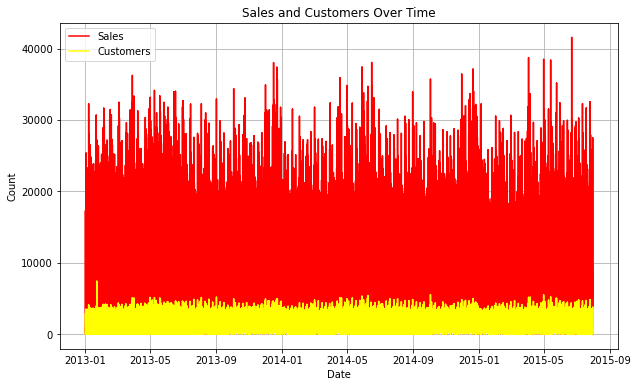

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Sales'], color='red', label='Sales')
plt.plot(train_data.index, train_data['Customers'], color='yellow', label='Customers')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Sales and Customers Over Time')
plt.legend()
plt.grid()
plt.show()






# Check for distribution in both training and test 

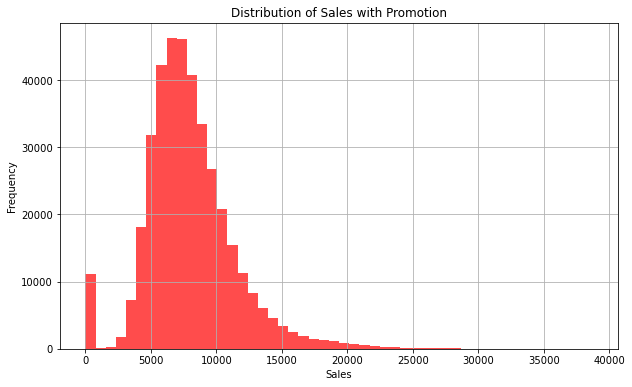

In [63]:
sales_with_promo = train_data[train_data['Promo'] == 1]['Sales']
sales_without_promo = train_data[train_data['Promo'] == 0]['Sales']

# Plot the distribution of sales with promotion
plt.figure(figsize=(10, 6))
plt.hist(sales_with_promo, bins=50, color='red', alpha=0.7)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales with Promotion')
plt.grid()
plt.show()

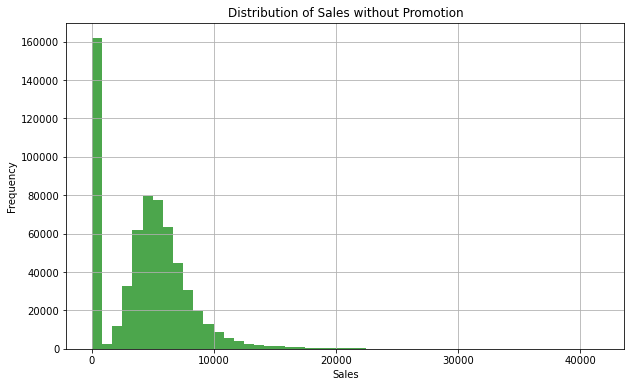

In [64]:
# Plot the distribution of sales without promotion
plt.figure(figsize=(10, 6))
plt.hist(sales_without_promo, bins=50, color='green', alpha=0.7)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales without Promotion')
plt.grid()
plt.show()

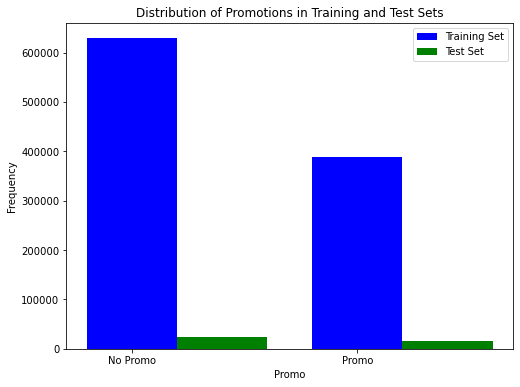

In [65]:
# the frequency of promotions in the training set
train_promo_counts = train_data['Promo'].value_counts()

# the frequency of promotions in the test set
test_promo_counts = test_data['Promo'].value_counts()

# Plot the distribution of promotions in the training set
plt.figure(figsize=(8, 6))
plt.bar(train_promo_counts.index, train_promo_counts.values, color='blue', width=0.4, label='Training Set')
plt.bar(test_promo_counts.index + 0.4, test_promo_counts.values, color='green', width=0.4, label='Test Set')
plt.xlabel('Promo')
plt.ylabel('Frequency')
plt.title('Distribution of Promotions in Training and Test Sets')
plt.xticks([0, 1], ['No Promo', 'Promo'])
plt.legend()
plt.show()

In [66]:
# the precentage of promotions in the training set
train_promo_percentage = (train_data['Promo'].sum() / len(train_data)) * 100

In [67]:
# the percentage of promotions in the test set
test_promo_percentage = (test_data['Promo'].sum() / len(test_data)) * 100

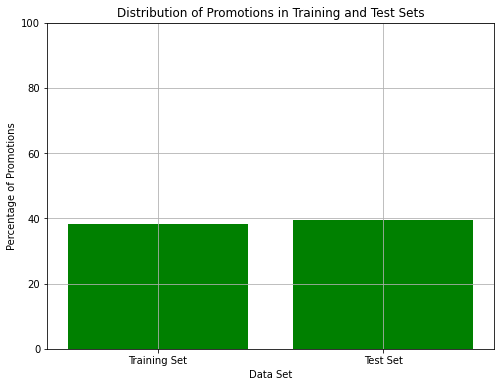

In [68]:
# distribution of promotions in the training set
plt.figure(figsize=(8, 6))
plt.bar(['Training Set', 'Test Set'], [train_promo_percentage, test_promo_percentage], color='green')
plt.xlabel('Data Set')
plt.ylabel('Percentage of Promotions')
plt.title('Distribution of Promotions in Training and Test Sets')
plt.ylim(0, 100)  # Set y-axis limit to ensure consistent scale
plt.grid()
plt.show()

we can see,in training dataset a slightly lower percentage of promotions compared to the test set, may be due to random sampling variations 


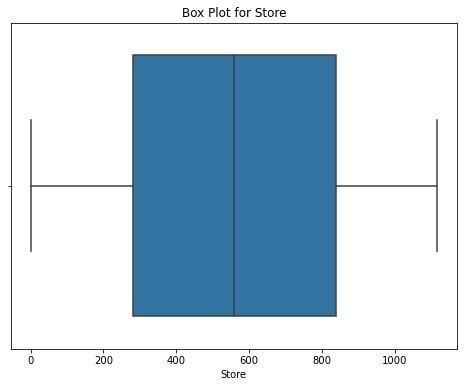

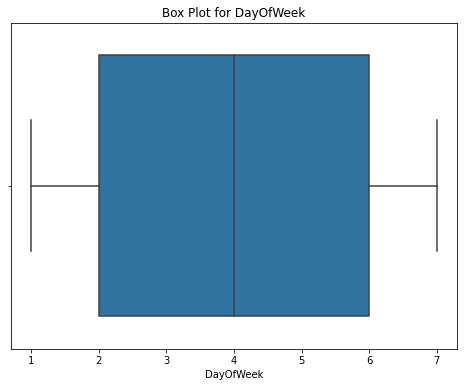

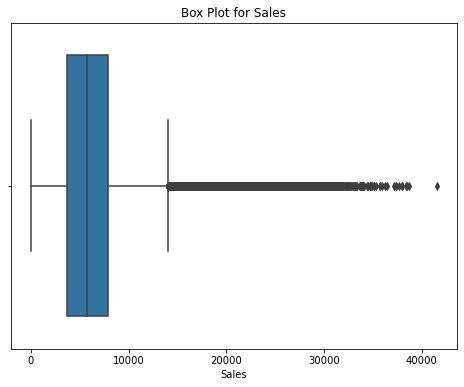

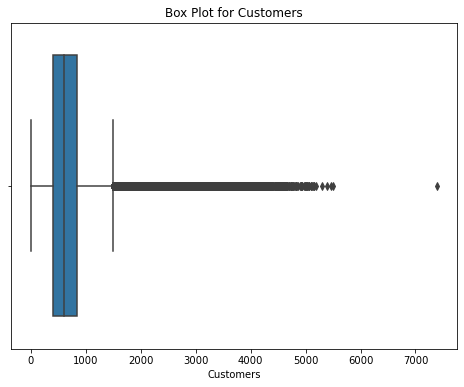

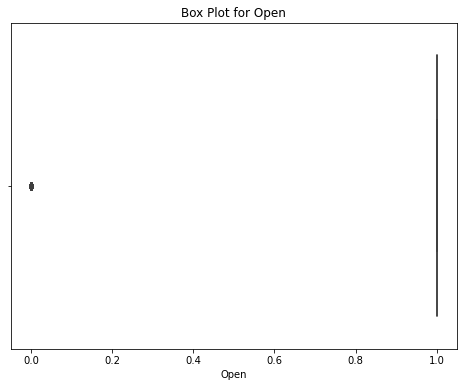

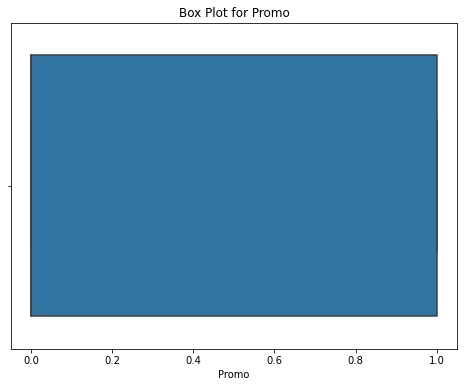

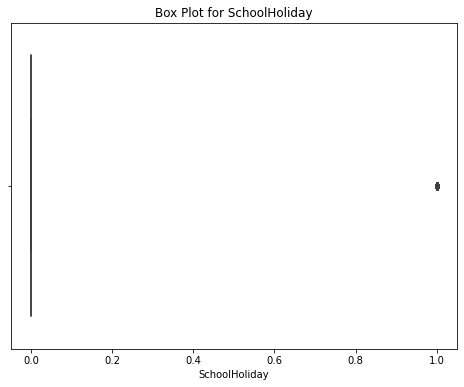

In [69]:
# List of numerical columns in the "train_data" DataFrame
numerical_columns = ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday']

# box plots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=train_data, x=col)
    plt.title(f'Box Plot for {col}')
    plt.show()

Outliners present in sales and customers boxplot

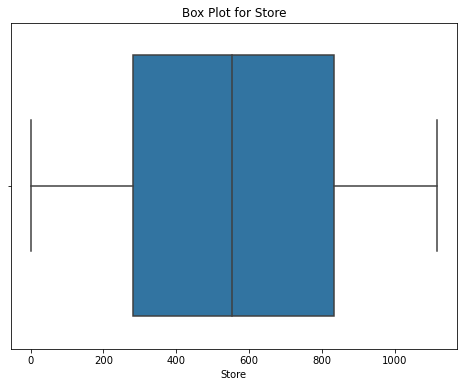

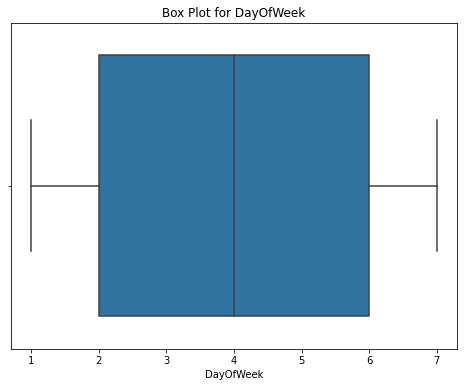

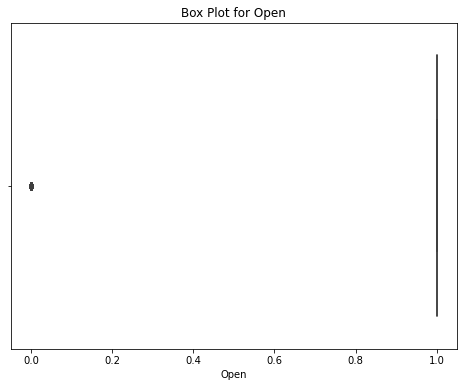

In [70]:
# List of numerical columns in the "test_data" DataFrame
numerical_columns = ['Store', 'DayOfWeek', 'Open']

# Create box plots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=test_data, x=col)
    plt.title(f'Box Plot for {col}')
    plt.show()

## outlier detection with iqr

In [71]:
q1 = np.percentile(train_data["Sales"], 25)
q2 = np.percentile(train_data["Sales"], 50)
q3 = np.percentile(train_data["Sales"], 75)

print(f"My Q1 = {q1}, Median = {q2}, Q3 = {q3}")

My Q1 = 3727.0, Median = 5744.0, Q3 = 7856.0


In [72]:
iqr=q3-q1
iqr
lower_range=q1-iqr*1.5
upper_range=q3+iqr*1.5
print(f"Lower range= {lower_range} , Upper Range= {upper_range}")

Lower range= -2466.5 , Upper Range= 14049.5


In [73]:
#  first quartile (Q1) and third quartile (Q3) for the "Sales" column
Q1_sales = train_data['Sales'].quantile(0.25)
Q3_sales = train_data['Sales'].quantile(0.75)

# interquartile range (IQR) for "Sales"
IQR_sales = Q3_sales - Q1_sales

# lower and upper bounds for outlier detection for "Sales"
lower_range_sales = Q1_sales - 1.5 * IQR_sales
upper_range_sales = Q3_sales + 1.5 * IQR_sales

# Identifying outliers in the "Sales" column
outliers_lower_sales = train_data[train_data['Sales'] < lower_range_sales]
outliers_upper_sales = train_data[train_data['Sales'] > upper_range_sales]

print(f"Outliers (lower bound): {outliers_lower_sales['Sales'].values}")
print(f"Outliers (upper bound): {outliers_upper_sales['Sales'].values}")

Outliers (lower bound): []
Outliers (upper bound): [15344 14190 14180 ... 20355 20642 17267]


In [74]:
train_data['Sales'] = train_data['Sales'].clip(lower_range_sales, upper_range_sales)

In [75]:
Q1 = train_data['Customers'].quantile(0.25)
Q3 = train_data['Customers'].quantile(0.75)

#interquartile range (IQR)
IQR = Q3 - Q1

# lower and upper bounds for outlier detection
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR

# Identifying outliers in the "Customers" column
outliers_lower = train_data[train_data['Customers'] < lower_range]
outliers_upper = train_data[train_data['Customers'] > upper_range]

print(f"Outliers (lower bound): {outliers_lower['Customers'].values}")
print(f"Outliers (upper bound): {outliers_upper['Customers'].values}")

Outliers (lower bound): []
Outliers (upper bound): [1498 1586 2041 ... 1751 1675 2377]


In [76]:
# Applying a transformation to the "Customers" column to cap the outliers at the upper bound
train_data['Customers'] = train_data['Customers'].clip(upper=upper_range)


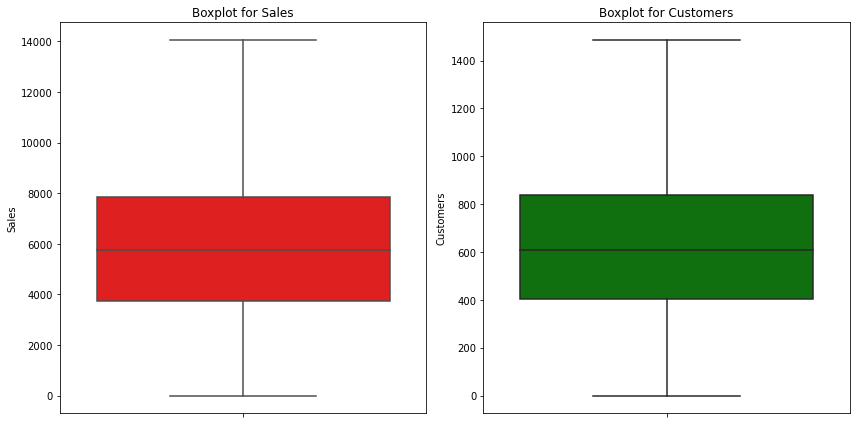

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Boxplot for Sales
sns.boxplot(data=train_data, y='Sales', ax=axes[0], color='red')
axes[0].set_title('Boxplot for Sales')

# Boxplot for Customers
sns.boxplot(data=train_data, y='Customers', ax=axes[1], color='green')
axes[1].set_title('Boxplot for Customers')

# Display the plots
plt.tight_layout()
plt.show()




#  Check & compare sales behavior before, during and after holidays

In [78]:
# a new column "HolidayPeriod" to categorize days as before, during, or after a holiday
train_data['HolidayPeriod'] = 'Regular Day'  # Default value for regular days

In [79]:
# "Before Holiday", "During Holiday", or "After Holiday"
train_data.loc[train_data['SchoolHoliday'] == 1, 'HolidayPeriod'] = 'During Holiday'
train_data.loc[train_data['StateHoliday'] != '0', 'HolidayPeriod'] = 'Before or After Holiday'


In [80]:
#  data by "HolidayPeriod" and calculate the average sales for each category
sales_by_holiday_period = train_data.groupby('HolidayPeriod')['Sales'].mean().reset_index()

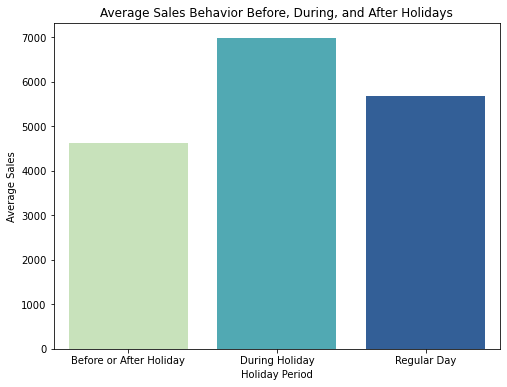

In [81]:
#  sales behavior before, during, and after holidays
plt.figure(figsize=(8, 6))
sns.barplot(data=sales_by_holiday_period, x='HolidayPeriod', y='Sales', palette='YlGnBu')
plt.xlabel('Holiday Period')
plt.ylabel('Average Sales')
plt.title('Average Sales Behavior Before, During, and After Holidays')
plt.show()

#### During Holiday period the sales is more compare to regualr day and days before or after the holiday

In [82]:
# unique values in the 'StateHoliday' column to identify holiday indicators
print(train_data['StateHoliday'].unique())

['0' 'a' 'b' 'c' 0]


In [83]:
 # '1' indicates holidays, create a new column 'Holiday' to indicate whether it's a holiday or not
train_data['Holiday'] = train_data['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)

In [84]:
# Split the data into three groups: before holiday, during holiday, and after holiday
before_holiday_sales = train_data[train_data['Holiday'] == 0]['Sales']
during_holiday_sales = train_data[train_data['Holiday'] == 1]['Sales']
after_holiday_sales = train_data[train_data['Holiday'].shift(-1) == 1]['Sales']  # Shift to identify after holiday

In [85]:
# Calculate the average sales for each group
average_sales_before_holiday = before_holiday_sales.mean()
average_sales_during_holiday = during_holiday_sales.mean()
average_sales_after_holiday = after_holiday_sales.mean()

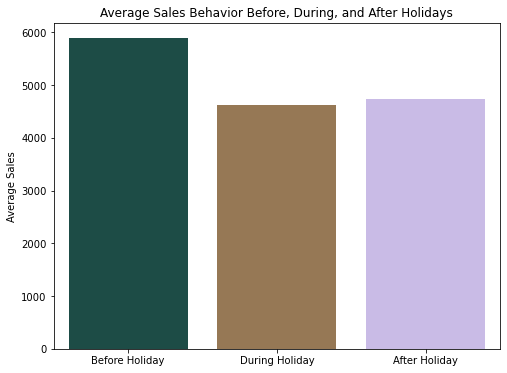

In [86]:
# Plot the average sales behavior before, during, and after holidays using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Before Holiday', 'During Holiday', 'After Holiday'],
            y=[average_sales_before_holiday, average_sales_during_holiday, average_sales_after_holiday],
            palette='cubehelix')
plt.title('Average Sales Behavior Before, During, and After Holidays')
plt.ylabel('Average Sales')
plt.show()

In [87]:
# Calculate the total sales for each group
total_sales_before_holiday = before_holiday_sales.sum()
total_sales_during_holiday = during_holiday_sales.sum()
total_sales_after_holiday = after_holiday_sales.sum()

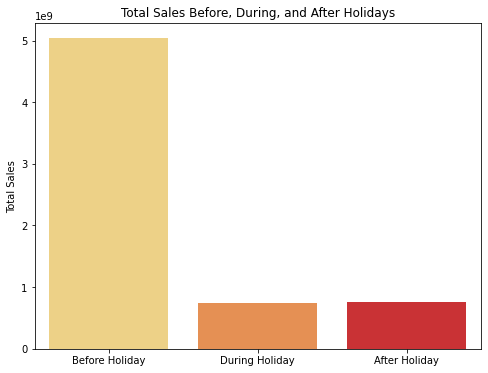

In [88]:
# Plot the total sales behavior before, during, and after holidays using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Before Holiday', 'During Holiday', 'After Holiday'],
            y=[total_sales_before_holiday, total_sales_during_holiday, total_sales_after_holiday],
            palette='YlOrRd')
plt.title('Total Sales Before, During, and After Holidays')
plt.ylabel('Total Sales')
plt.show()

Average and Total sales is high before holiday

#  lets Find any seasonal (Christmas, Easter etc) purchase behaviours**

In [89]:
train_data.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'HolidayPeriod', 'Holiday'],
      dtype='object')

In [90]:
# Assuming '1' indicates holidays, create a new column 'Holiday' to indicate whether it's a holiday or not
train_data['Holiday'] = train_data['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)

In [91]:
def is_christmas(date):
    return date.month == 12 and date.day in [24, 25, 26, 27, 28, 29, 30, 31]

In [92]:
def is_easter(date):
    return date.month == 4 and date.day in [18, 19, 20, 21, 22, 23, 24, 25]


In [93]:

def is_valentines_day(date):
    return date.month == 2 and date.day in [14, 15]

In [94]:
def is_halloween(date):
    return date.month == 10 and date.day == 31

In [95]:

def is_new_year(date):
    return date.month == 1 and date.day in [1]

In [96]:
train_data.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'HolidayPeriod', 'Holiday'],
      dtype='object')

In [98]:
train_data['Date'] = pd.to_datetime(train_data['Date'])

KeyError: 'Date'

In [99]:
train_data['Christmas'] = train_data['Date'].apply(lambda x: 1 if is_christmas(x) else 0)


KeyError: 'Date'

In [ ]:
train_data['Easter'] = train_data['Date'].apply(lambda x: 1 if is_easter(x) else 0)


In [ ]:
train_data["ValentinesDay"] = train_data['Date'].apply(lambda x: 1 if is_valentines_day(x) else 0)


In [ ]:
train_data["NewYear"] = train_data['Date'].apply(lambda x: 1 if is_new_year(x) else 0)


In [ ]:
train_data["Halloween"] = train_data['Date'].apply(lambda x: 1 if is_halloween(x) else 0)


In [101]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['Christmas'] = train_data['Date'].apply(lambda x: 1 if is_christmas(x) else 0)
train_data['Easter'] = train_data['Date'].apply(lambda x: 1 if is_easter(x) else 0)
train_data["ValentinesDay"] = train_data['Date'].apply(lambda x: 1 if is_valentines_day(x) else 0)
train_data["NewYear"] = train_data['Date'].apply(lambda x: 1 if is_new_year(x) else 0)
train_data["Halloween"] = train_data['Date'].apply(lambda x: 1 if is_halloween(x) else 0)


KeyError: 'Date'

In [102]:

average_customers_christmas = train_data.groupby('Christmas')['Customers'].mean()
average_customers_easter = train_data.groupby('Easter')['Customers'].mean()
average_customers_valentines_day = train_data.groupby('ValentinesDay')['Customers'].mean()
average_customers_halloween = train_data.groupby('Halloween')['Customers'].mean()
average_customers_new_year = train_data[train_data['NewYear'] == 1]['Customers'].mean()

KeyError: 'Christmas'

In [103]:
special_occasions = ['Christmas', 'Easter', "Valentine's Day", 'Halloween', 'New Year']
average_customers = [average_customers_christmas, average_customers_easter, average_customers_valentines_day,
                     average_customers_halloween, average_customers_new_year]



NameError: name 'average_customers_christmas' is not defined

In [104]:
average_customers = [average_customers_christmas, average_customers_easter, average_customers_valentines_day,
                     average_customers_halloween, average_customers_new_year]



NameError: name 'average_customers_christmas' is not defined

In [105]:
plt.figure(figsize=(8, 6))
sns.barplot(x=special_occasions, y=[avg.mean() for avg in average_customers], palette='coolwarm')
plt.title('Average Number of Customers on Special Occasions')
plt.xlabel('Occasion')
plt.ylabel('Average Number of Customers')
plt.xticks(rotation=45)
plt.show()

NameError: name 'average_customers' is not defined

<Figure size 576x432 with 0 Axes>

In [106]:
average_sales_christmas = train_data.groupby('Christmas')['Sales'].mean()
average_sales_easter = train_data.groupby('Easter')['Sales'].mean()
average_sales_valentines_day = train_data.groupby('ValentinesDay')['Sales'].mean()
average_sales_halloween = train_data.groupby('Halloween')['Sales'].mean()
average_sales_new_year = train_data[train_data['NewYear'] == 1]['Sales'].mean()


average_sales = [average_sales_christmas.mean(), average_sales_easter.mean(),
                 average_sales_valentines_day.mean(), average_sales_halloween.mean(),
                 average_sales_new_year]

print(average_sales)

KeyError: 'Christmas'

In [107]:
plt.figure(figsize=(8, 6))
sns.barplot(x=special_occasions, y=average_sales, palette='coolwarm')
plt.title('Average Sales on Special Occasions')
plt.xlabel('Occasion')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

NameError: name 'average_sales' is not defined

<Figure size 576x432 with 0 Axes>

####**Sales and customer are higest on Halloween and lowest in New Year**

In [108]:
def get_season(date):
    month = date.month
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn/Fall'
    else:
        return 'Winter'

train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['Season'] = train_data['Date'].apply(get_season)

# Calculate the average sales for each season
average_sales_season = train_data.groupby('Season')['Sales'].mean().reset_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Sales', data=average_sales_season, palette='coolwarm')
plt.title('Average Sales by Season')
plt.xlabel('Season')
plt.ylabel('Average Sales')
plt.show()


KeyError: 'Date'

In [109]:
# Calculate average sales and customers for each season
average_sales_by_season = train_data.groupby('Season')['Sales'].mean()
average_customers_by_season = train_data.groupby('Season')['Customers'].mean()

# Create a list of seasons and their respective average sales and customers
seasons = average_sales_by_season.index
average_sales = average_sales_by_season.values
average_customers = average_customers_by_season.values

# Plot the bar plots for average sales and customers by season
plt.figure(figsize=(10, 6))

# Bar plot for average sales
plt.subplot(1, 2, 1)
sns.barplot(x=seasons, y=average_sales, palette='coolwarm')
plt.title('Average Sales by Season')
plt.xlabel('Season')
plt.ylabel('Average Sales')

# Bar plot for average customers
plt.subplot(1, 2, 2)
sns.barplot(x=seasons, y=average_customers, palette='coolwarm')
plt.title('Average Customers by Season')
plt.xlabel('Season')
plt.ylabel('Average Customers')

plt.tight_layout()
plt.show()







KeyError: 'Season'

In [110]:
def get_season(date):
    month = date.month
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn/Fall'
    else:
        return 'Winter'

def is_christmas(date):
    return date.month == 12 and date.day in [24, 25, 26, 27, 28, 29, 30, 31]

def is_easter(date):
    return date.month == 4 and date.day in [18, 19, 20, 21, 22, 23, 24, 25]

def is_valentines_day(date):
    return date.month == 2 and date.day in [14, 15]

def is_friendship_day(date):
    return date.month == 8 and date.day in [1]

def is_new_year(date):
    return date.month == 1 and date.day in [1]

def is_halloween(date):
    return date.month == 10 and date.day == 31

train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['Season'] = train_data['Date'].apply(get_season)
train_data['Christmas'] = train_data['Date'].apply(lambda x: 1 if is_christmas(x) else 0)
train_data['Easter'] = train_data['Date'].apply(lambda x: 1 if is_easter(x) else 0)
train_data['ValentinesDay'] = train_data['Date'].apply(lambda x: 1 if is_valentines_day(x) else 0)

train_data['NewYear'] = train_data['Date'].apply(lambda x: 1 if is_new_year(x) else 0)
train_data['Halloween'] = train_data['Date'].apply(lambda x: 1 if is_halloween(x) else 0)

# Calculate the average sales for each combination of season and occasion
grouped_data = train_data.groupby(['Season', 'Christmas', 'Easter', 'ValentinesDay', 'NewYear', 'Halloween'])['Sales'].mean().reset_index()

# Reshape the data for plotting
grouped_data_melted = pd.melt(grouped_data, id_vars='Season', value_vars=['Christmas', 'Easter', 'ValentinesDay', 'NewYear', 'Halloween'], var_name='Occasion', value_name='Average Sales')

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Average Sales', hue='Occasion', data=grouped_data_melted, palette='coolwarm')
plt.title('Average Sales by Season and Occasion')
plt.xlabel('Season')
plt.ylabel('Average Sales')
plt.legend(title='Occasion', bbox_to_anchor=(1, 1))
plt.show()



KeyError: 'Date'

### need of medication is more in spring, Autumn and winter (sickness due to climate)

In [111]:
# Extract year, month, and day from the 'Date' column
train_data['Year'] = train_data['Date'].dt.year
train_data['Month'] = train_data['Date'].dt.month
train_data['Day'] = train_data['Date'].dt.day

# Filter data for the year 2014
open_store = train_data[(train_data['Open'] == 1) & (train_data['Year'] == 2014)]

christmas_month = 12
easter_month = 4

christmas_month_data = open_store[open_store['Month'] == christmas_month]
easter_month_data = open_store[open_store['Month'] == easter_month]

# Plotting the average sales around Christmas
around_christmas = christmas_month_data[(christmas_month_data['Day'] > 20) & (christmas_month_data['Day'] < 30)]
around_christmas = around_christmas[['Day', 'Sales']].groupby('Day').mean()

# Plotting the average sales around Easter
around_easter = easter_month_data[(easter_month_data['Day'] > 15) & (easter_month_data['Day'] < 25)]
around_easter = around_easter[['Day', 'Sales']].groupby('Day').mean()

# Creating bar plots with colorful bars
plt.figure(figsize=(12, 6))
colors = sns.color_palette("coolwarm", len(around_christmas))
plt.bar(around_christmas.index, around_christmas['Sales'], color=colors, alpha=0.7)
plt.xlabel('Day of December')
plt.ylabel('Average Sales')
plt.title('Average Sales during the month of December (Christmas)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
colors = sns.color_palette("coolwarm", len(around_easter))
plt.bar(around_easter.index, around_easter['Sales'], color=colors, alpha=0.7)
plt.xlabel('Day of April')
plt.ylabel('Average Sales')
plt.title('Average Sales during the month of April (Easter)')
plt.grid(True)
plt.show()



KeyError: 'Date'

# **What can you say about the correlation between sales and number of customers?**

In [112]:
# Correlation between Sales and number of customers
train_data[['Customers','Sales']].corr()


,Customers,Sales
Customers,1.000000,0.920805
Sales,0.920805,1.000000


In [113]:
# Correlation between promo and sales
train_data[['Promo','Sales']].corr()


,Promo,Sales
Promo,1.000000,0.468557
Sales,0.468557,1.000000


In [114]:
# Correlation between promo, Customers and sales
train_data[['Promo', 'Customers','Sales']].corr()

,Promo,Customers,Sales
Promo,1.000000,0.362733,0.468557
Customers,0.362733,1.000000,0.920805
Sales,0.468557,0.920805,1.000000


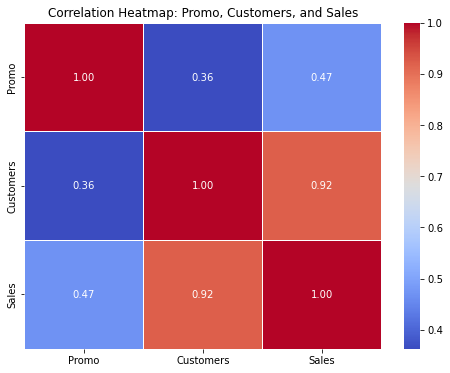

In [115]:
correlation_matrix = train_data[['Promo', 'Customers', 'Sales']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Promo, Customers, and Sales')
plt.show()

In [116]:
correlation_sales_customers = train_data['Sales'].corr(train_data['Customers'])
print(f"Correlation between Sales and Customers: {correlation_sales_customers}")

Correlation between Sales and Customers: 0.9208048531996522


This value indicates a strong positive correlation between these two variables.  as the number of customers increases, the sales tend to increase as well, and vice versa.

This strong positive correlation is expected since it is common for businesses to experience higher sales when there are more customers. The high correlation coefficient suggests that the number of customers is a good indicator of sales performance, and it can be a useful feature for predicting future sales in the dataset.

# **How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers? **

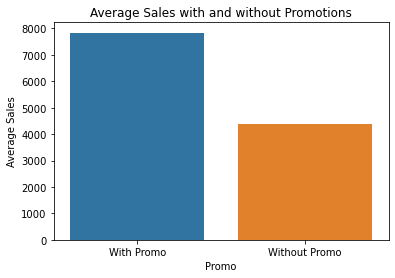

In [118]:
avg_sales_with_promo = train_data[train_data['Promo'] == 1]['Sales'].mean()
avg_sales_without_promo = train_data[train_data['Promo'] == 0]['Sales'].mean()

# Create a bar plot to compare average sales with and without promotions
plt.figure(figsize=(6, 4))
sns.barplot(x=['With Promo', 'Without Promo'], y=[avg_sales_with_promo, avg_sales_without_promo])
plt.title('Average Sales with and without Promotions')
plt.xlabel('Promo')
plt.ylabel('Average Sales')
plt.show()

Are the promos attracting more customers?

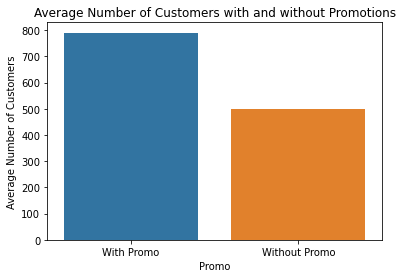

In [119]:
avg_customers_with_promo = train_data[train_data['Promo'] == 1]['Customers'].mean()
avg_customers_without_promo = train_data[train_data['Promo'] == 0]['Customers'].mean()

# Create a bar plot to compare average number of customers with and without promotions
plt.figure(figsize=(6, 4))
sns.barplot(x=['With Promo', 'Without Promo'], y=[avg_customers_with_promo, avg_customers_without_promo])
plt.title('Average Number of Customers with and without Promotions')
plt.xlabel('Promo')
plt.ylabel('Average Number of Customers')
plt.show()

Promo is playing vital role in getting more customers

How does it affect already existing customers?

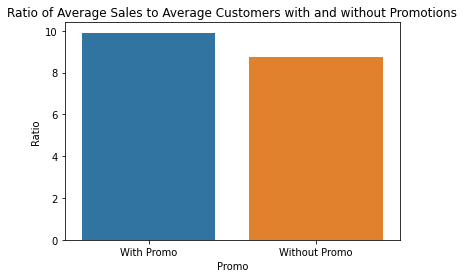

In [120]:
avg_sales_with_promo = train_data[train_data['Promo'] == 1]['Sales'].mean()
avg_customers_with_promo = train_data[train_data['Promo'] == 1]['Customers'].mean()
avg_sales_without_promo = train_data[train_data['Promo'] == 0]['Sales'].mean()
avg_customers_without_promo = train_data[train_data['Promo'] == 0]['Customers'].mean()

# Calculate the ratio of average sales to average customers for days with and without promotions
ratio_with_promo = avg_sales_with_promo / avg_customers_with_promo
ratio_without_promo = avg_sales_without_promo / avg_customers_without_promo

# Create a bar plot to compare the ratios of average sales to average customers with and without promotions
plt.figure(figsize=(6, 4))
sns.barplot(x=['With Promo', 'Without Promo'], y=[ratio_with_promo, ratio_without_promo])
plt.title('Ratio of Average Sales to Average Customers with and without Promotions')
plt.xlabel('Promo')
plt.ylabel('Ratio')
plt.show()

 This suggests that promotions are attracting more customers and leading to increased sales. 

# **Could the promos be deployed in more effective ways? Which stores should promos be deployed in?**

In [121]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [122]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7652.849306,2.653302,5.117695,0.500078,10.115915,1.198099
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,720.000000,6.000000,2008.000000,0.000000,22.000000,2011.763573
50%,558.00000,2330.000000,7.224704,2008.668857,1.000000,23.595447,2011.763573
75%,836.50000,6875.000000,9.000000,2011.000000,1.000000,23.595447,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [123]:
correlation_matrix=store.corr()

In [124]:
correlation_matrix

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,-0.027199,-0.041638,-0.003846,7.486424e-03,5.500725e-03,2.875242e-02
CompetitionDistance,-0.027199,1.000000,-0.049668,0.021105,-1.455173e-01,-3.046905e-02,-5.460175e-02
CompetitionOpenSinceMonth,-0.041638,-0.049668,1.000000,-0.052250,-9.483054e-03,-1.866962e-02,2.655012e-02
CompetitionOpenSinceYear,-0.003846,0.021105,-0.052250,1.000000,-6.318232e-02,-4.968387e-02,1.490245e-03
Promo2,0.007486,-0.145517,-0.009483,-0.063182,1.000000e+00,1.124715e-16,-5.604138e-14
Promo2SinceWeek,0.005501,-0.030469,-0.018670,-0.049684,1.124715e-16,1.000000e+00,-2.176504e-01
Promo2SinceYear,0.028752,-0.054602,0.026550,0.001490,-5.604138e-14,-2.176504e-01,1.000000e+00


* The correlation matrix shows the relationships between numeric variables.
* CompetitionDistance has a weak negative correlation with Store, indicating distant stores may have slightly lower store numbers.
* Promo2 has a very weak positive correlation with Store, suggesting higher store numbers might have Promo2 active.
* Promo2SinceWeek and Promo2SinceYear weakly negatively correlate with CompetitionDistance, implying distant stores started Promo2 slightly earlier.
* Correlations don't show causation, and further analysis like A/B testing or predictive modeling is needed to assess promotion effectiveness.







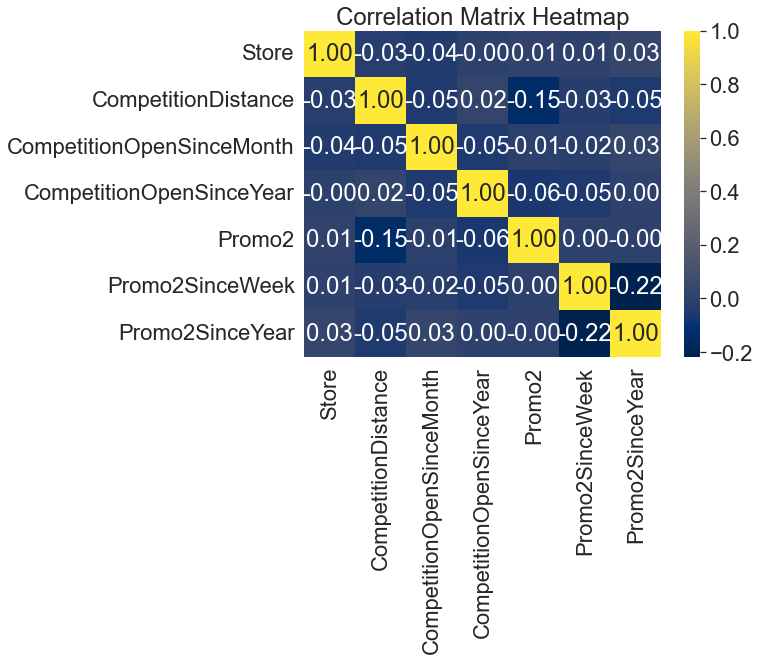

In [165]:
# the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="cividis", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

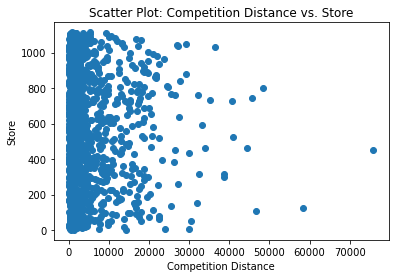

In [126]:
# Scatter plot to visualize the relationship
plt.scatter(store['CompetitionDistance'], store['Store'])
plt.xlabel('Competition Distance')
plt.ylabel('Store')
plt.title('Scatter Plot: Competition Distance vs. Store')
plt.show()

correlation matrix suggests that there is a weak negative correlation between the "CompetitionDistance" and "Store" variables. A correlation coefficient close to -1 indicates a weak negative linear relationship. In this context, it means that as the competition distance increases (stores are farther away from competitors), there is a slight tendency for the store numbers to be slightly lower.

Number of Stores with less than 5143.545555555555 mean sales are 112


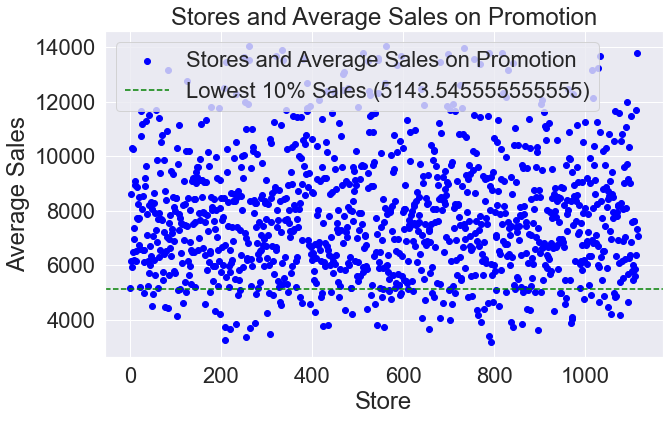

In [163]:
store_with_promo = train_data[train_data['Promo'] == 1]
result = store_with_promo.groupby('Store').agg({"Sales": "mean", 'Customers': 'sum'})

low_sales = result['Sales'].quantile(0.1)  # Least 10 percent sales
small_sales = result[result['Sales'] <= low_sales]

print(f"Number of Stores with less than {low_sales} mean sales are {small_sales.shape[0]}")

plt.figure(figsize=(10, 6))
plt.scatter(result.index, result['Sales'], label='Stores and Average Sales on Promotion', color='blue')
plt.axhline(y=low_sales, color='green', linestyle='--', label=f'Lowest 10% Sales ({low_sales})')
plt.xlabel('Store')
plt.ylabel('Average Sales')
plt.title('Stores and Average Sales on Promotion')
plt.legend()
plt.show()

Insight :-> so we have 112 stores which will need more promotion to increase the sales

In [128]:
# Calculate the percentage increase in sales during promos
train_data['Sales_Promo_Increase'] = (train_data['Sales'] / train_data['Sales'].mean() - 1) * 100

# Calculate the percentage increase in customers during promos
train_data['Customers_Promo_Increase'] = (train_data['Customers'] / train_data['Customers'].mean() - 1) * 100

# Group the data by store to get the average percentage increase in sales and customers during promos
promo_effectiveness = train_data.groupby('Store')[['Sales_Promo_Increase', 'Customers_Promo_Increase']].mean()

# Identify the stores with the highest increase in sales and customers during promos
stores_with_high_sales_increase = promo_effectiveness.sort_values(by='Sales_Promo_Increase', ascending=False).head(10)
stores_with_high_customers_increase = promo_effectiveness.sort_values(by='Customers_Promo_Increase', ascending=False).head(10)

print("Stores with highest increase in Sales during promos:")
print(stores_with_high_sales_increase)

print("\nStores with highest increase in Customers during promos:")
print(stores_with_high_customers_increase)

Stores with highest increase in Sales during promos:
       Sales_Promo_Increase  Customers_Promo_Increase
Store                                                
262              146.847390                142.982167
562              144.919775                142.982167
733              141.029019                142.934226
1114             105.083401                102.089106
788              104.784646                 99.494392
335              104.661109                139.862882
513              104.313023                101.921313
817              104.148895                101.816398
251              103.685069                100.679192
383              103.079062                100.958847

Stores with highest increase in Customers during promos:
       Sales_Promo_Increase  Customers_Promo_Increase
Store                                                
562              144.919775                142.982167
262              146.847390                142.982167
733              141.0290

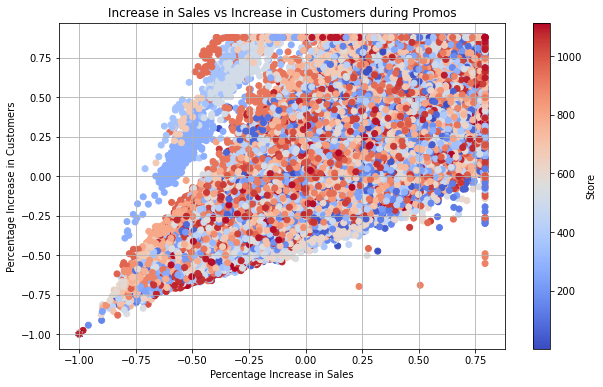

In [129]:
stores_with_promo = train_data[train_data['Promo'] == 1]

# Calculate the percentage increase in Sales and Customers during promos for each store
stores_with_promo['Sales_Promo_Increase'] = (stores_with_promo['Sales'] / stores_with_promo['Sales'].mean()) - 1
stores_with_promo['Customers_Promo_Increase'] = (stores_with_promo['Customers'] / stores_with_promo['Customers'].mean()) - 1

# Scatter plot for increase in Sales vs increase in Customers during promos
plt.figure(figsize=(10, 6))
plt.scatter(stores_with_promo['Sales_Promo_Increase'], stores_with_promo['Customers_Promo_Increase'], c=stores_with_promo['Store'], cmap='coolwarm')
plt.colorbar(label='Store')
plt.xlabel('Percentage Increase in Sales')
plt.ylabel('Percentage Increase in Customers')
plt.title('Increase in Sales vs Increase in Customers during Promos')
plt.grid(True)
plt.show()

In [130]:



# Filter data for stores with promos
stores_with_promo = train_data[train_data['Promo'] == 1]

# Calculate the percentage increase in Sales and Customers during promos for each store
stores_with_promo['Sales_Promo_Increase'] = (stores_with_promo['Sales'] / stores_with_promo['Sales'].mean()) - 1
stores_with_promo['Customers_Promo_Increase'] = (stores_with_promo['Customers'] / stores_with_promo['Customers'].mean()) - 1

# Calculate the average percentage increase in Sales and Customers during promos for each store
average_sales_increase = stores_with_promo.groupby('Store')['Sales_Promo_Increase'].mean()
average_customers_increase = stores_with_promo.groupby('Store')['Customers_Promo_Increase'].mean()

# Determine stores with higher than average percentage increase in both Sales and Customers
target_stores = stores_with_promo[
    (stores_with_promo['Sales_Promo_Increase'] > average_sales_increase.mean()) &
    (stores_with_promo['Customers_Promo_Increase'] > average_customers_increase.mean())
]

# Print the list of stores where promos have a higher impact on both Sales and Customers
print("Stores where promos have a higher impact on both Sales and Customers:")
print(target_stores['Store'].unique())


Stores where promos have a higher impact on both Sales and Customers:
[   3    4    7    8   11   12   16   17   18   20   24   25   27   33
   34   36   37   39   42   47   54   57   63   64   67   68   69   71
   76   82   84   90   95   97  101  102  104  106  107  108  109  112
  118  120  122  123  125  127  129  133  137  138  140  141  144  145
  147  148  150  151  154  156  157  159  161  164  167  168  171  173
  178  179  180  181  187  189  190  191  192  195  197  200  203  205
  206  207  209  211  214  216  223  229  230  233  234  236  238  243
  245  246  247  248  250  251  252  253  256  259  261  262  264  267
  269  270  271  273  278  279  283  287  291  296  297  298  299  300
  303  304  308  310  311  313  316  319  320  327  333  335  336  340
  342  343  344  348  349  353  354  355  357  358  360  361  362  363
  368  372  374  375  376  377  378  380  381  382  383  384  387  388
  389  390  391  396  397  398  400  403  410  411  413  416  417  418
  419  

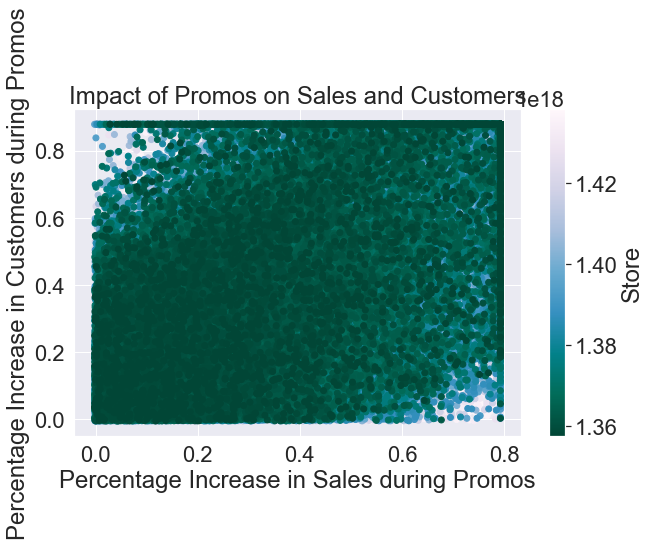

In [170]:
# Scatter plot for increase in Sales vs increase in Customers during promos
plt.figure(figsize=(10, 6))
plt.scatter(target_stores['Sales_Promo_Increase'], target_stores['Customers_Promo_Increase'], c=target_stores.index, cmap='PuBuGn_r')
plt.colorbar(label='Store')
plt.xlabel('Percentage Increase in Sales during Promos')
plt.ylabel('Percentage Increase in Customers during Promos')
plt.title('Impact of Promos on Sales and Customers')
plt.grid(True)
plt.show()

Based on the analysis, it appears that promos can be deployed in more effective ways, and there are specific stores where promos show a significant impact on both sales and customer numbers.

The analysis suggests that there are certain stores where promos lead to a considerable increase in both sales and customer visits. These stores have shown the highest percentage increase in sales and customers during promotional periods compared to the average sales and customers across all stores.

To make the promos more effective, the company should consider focusing on these specific stores where promos have a strong positive impact. By targeting these stores with well-planned and strategic promotional activities, the company can further enhance sales and customer engagement during promo periods.

In summary, promos should be deployed in a more targeted and strategic manner, with a particular focus on the stores that have shown the highest impact in terms of increased sales and customers during promotional periods. This approach can maximize the effectiveness of promos and lead to better overall performance for the company.

# ** Trends of customer behavior during store open and closing times**

<Figure size 864x504 with 0 Axes>

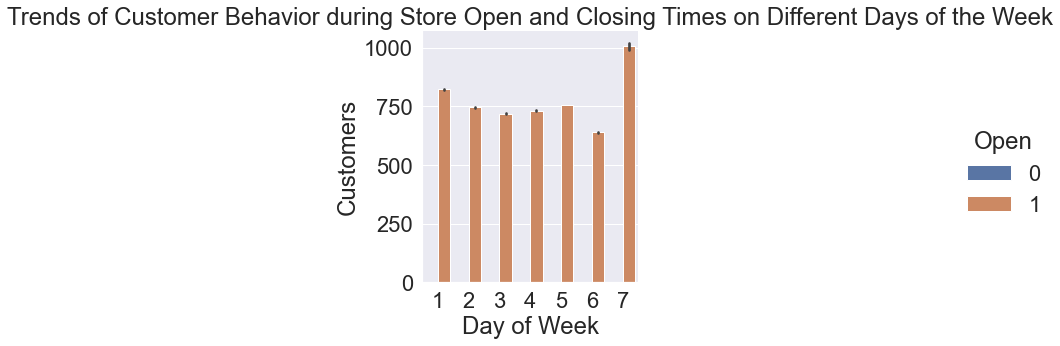

In [161]:
plt.figure(figsize=(12, 7))
sns.catplot(data=train_data, x="DayOfWeek", y="Customers", hue='Open', kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Customers')
plt.title('Trends of Customer Behavior during Store Open and Closing Times on Different Days of the Week')
plt.show()

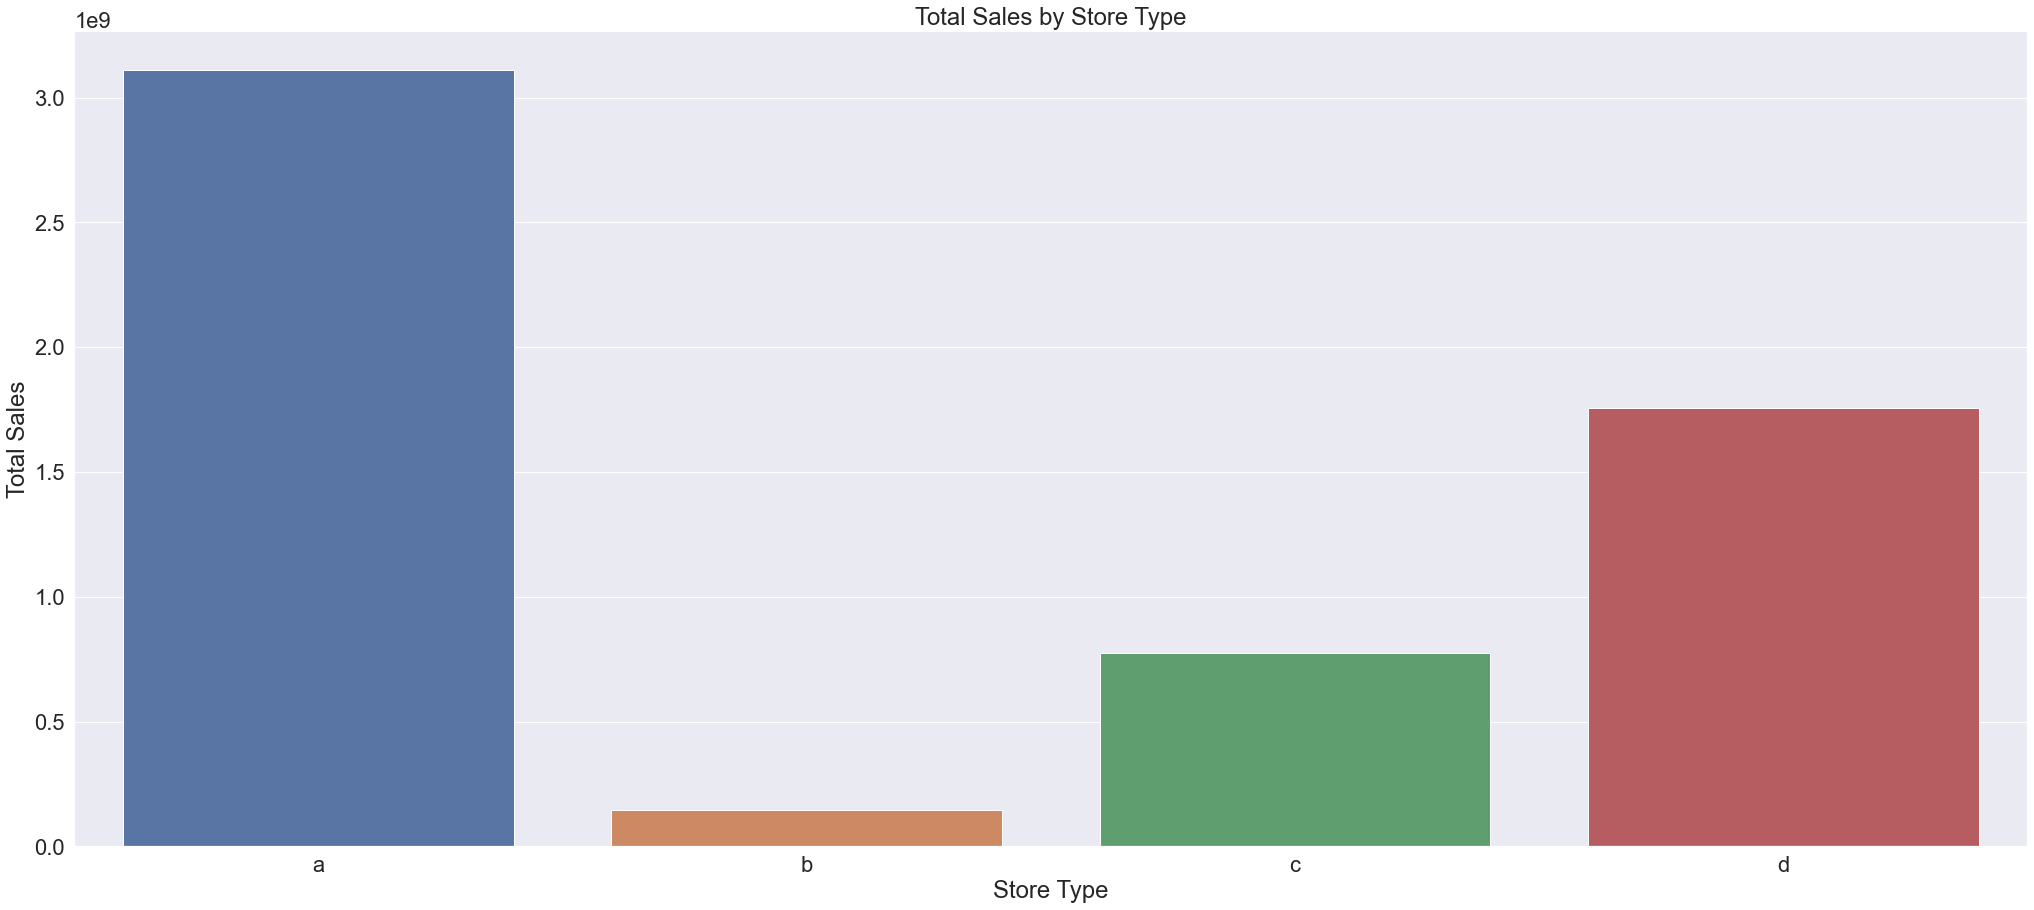

In [162]:
# Merge 'train_data' with 'store' on 'Store' column
merged_data = train_data.merge(store[['Store', 'StoreType']], on='Store', how='left')

# Grouping by 'StoreType' and aggregating count of 'DayOfWeek' and sum of 'Sales'
weekday_data1 = merged_data.groupby('StoreType').agg({"DayOfWeek": "count", "Sales": "sum"})

plt.figure(figsize=(35, 15))
sns.barplot(x=weekday_data1.index, y="Sales", data=weekday_data1)
plt.xlabel("Store Type")
plt.ylabel("Total Sales")
plt.title("Total Sales by Store Type")
plt.show()

# **Which stores are opened on all weekdays? How does that affect their sales on weekends? **

In [134]:
train_data

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,HolidayPeriod,Holiday,Sales_Promo_Increase,Customers_Promo_Increase
Date,,,,,,,,,,,,
2015-07-31,1,5,5263.0,555.0,1,1,0,1,During Holiday,0,-7.517596,-9.188483
2015-07-31,2,5,6064.0,625.0,1,1,0,1,During Holiday,0,6.557723,2.265222
2015-07-31,3,5,8314.0,821.0,1,1,0,1,During Holiday,0,46.095137,34.335595
2015-07-31,4,5,13995.0,1485.0,1,1,0,1,During Holiday,0,145.922714,142.982167
2015-07-31,5,5,4822.0,559.0,1,1,0,1,During Holiday,0,-15.266929,-8.533986
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,1111,2,0.0,0.0,0,0,a,1,Before or After Holiday,1,-100.000000,-100.000000
2013-01-01,1112,2,0.0,0.0,0,0,a,1,Before or After Holiday,1,-100.000000,-100.000000
2013-01-01,1113,2,0.0,0.0,0,0,a,1,Before or After Holiday,1,-100.000000,-100.000000


In [135]:
# Group the data by 'Store' and check if all weekdays have 'Open' value of 1
stores_open_all_weekdays = train_data[train_data['DayOfWeek'].isin([1, 2, 3, 4, 5])].groupby('Store')['Open'].all()

# Get the list of store IDs that are opened on all weekdays
stores_open_all_weekdays = stores_open_all_weekdays[stores_open_all_weekdays].index.tolist()

# Separate the data for stores opened on all weekdays and stores not opened on all weekdays
stores_open_all_weekdays_data = train_data[train_data['Store'].isin(stores_open_all_weekdays)]
stores_not_open_all_weekdays_data = train_data[~train_data['Store'].isin(stores_open_all_weekdays)]

# Group the data by 'DayOfWeek' and calculate the average sales for both groups
average_sales_weekends_stores_open_all_weekdays = stores_open_all_weekdays_data[stores_open_all_weekdays_data['DayOfWeek'].isin([6, 7])]['Sales'].mean()
average_sales_weekends_stores_not_open_all_weekdays = stores_not_open_all_weekdays_data[stores_not_open_all_weekdays_data['DayOfWeek'].isin([6, 7])]['Sales'].mean()

# Print the average sales for weekends for both groups
print("Average Sales on Weekends for Stores Open on All Weekdays:", average_sales_weekends_stores_open_all_weekdays)
print("Average Sales on Weekends for Stores Not Open on All Weekdays:", average_sales_weekends_stores_not_open_all_weekdays)

Average Sales on Weekends for Stores Open on All Weekdays: 10329.864552238805
Average Sales on Weekends for Stores Not Open on All Weekdays: 2920.213656810098


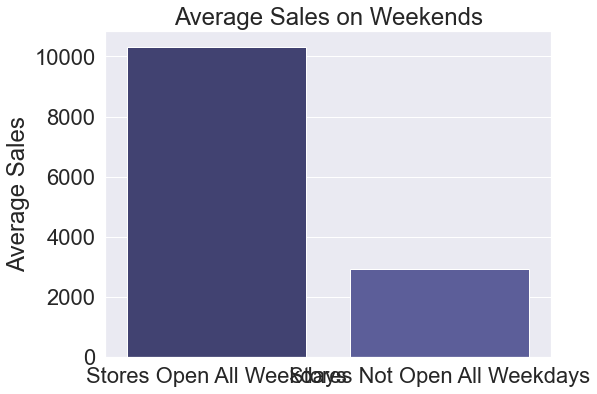

In [160]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['Stores Open All Weekdays', 'Stores Not Open All Weekdays'],
            y=[average_sales_weekends_stores_open_all_weekdays, average_sales_weekends_stores_not_open_all_weekdays],
            palette='tab20b')
plt.title('Average Sales on Weekends')
plt.ylabel('Average Sales')
plt.show()

In [137]:
stores_open_on_weekends = train_data[(train_data['DayOfWeek'].isin([6, 7])) & (train_data['Open'] == 1)]

# Get the unique store IDs of stores that are open on weekends
stores_open_on_weekends_ids = stores_open_on_weekends['Store'].unique()

# Print the store IDs that are open on weekends
print("Stores open on weekends:")
print(stores_open_on_weekends_ids)

Stores open on weekends:
[  85  122  209 ... 1115  876  292]


In [138]:
num_stores_open_on_weekends = len(stores_open_on_weekends_ids)

# Print the number of stores open on weekends
print("Number of stores open on weekends:", num_stores_open_on_weekends)

Number of stores open on weekends: 1115


In [139]:
total_num_stores = train_data['Store'].nunique()

# Calculate the percentage of stores open on weekends
percentage_open_on_weekends = (num_stores_open_on_weekends / total_num_stores) * 100

# Print the result
print("Number of stores open on weekends:", num_stores_open_on_weekends)
print("Total number of stores:", total_num_stores)
print("Percentage of stores open on weekends:", percentage_open_on_weekends, "%")

Number of stores open on weekends: 1115
Total number of stores: 1115
Percentage of stores open on weekends: 100.0 %


In [140]:
# Get the unique store IDs of all stores
all_stores_ids = train_data['Store'].unique()

# Get the unique store IDs of stores that are open on weekends
stores_open_on_weekends_ids = train_data[(train_data['DayOfWeek'].isin([6, 7])) & (train_data['Open'] == 1)]['Store'].unique()

# Find the store IDs that are closed on weekends (not in the stores_open_on_weekends_ids)
stores_closed_on_weekends_ids = set(all_stores_ids) - set(stores_open_on_weekends_ids)

# Print the store IDs that are closed on weekends
print("Stores closed on weekends:")
print(stores_closed_on_weekends_ids)

# Get the total number of unique stores in the dataset
total_num_stores = train_data['Store'].nunique()

# Calculate the number of stores closed on weekends
num_stores_closed_on_weekends = len(stores_closed_on_weekends_ids)

# Calculate the percentage of stores closed on weekends
percentage_closed_on_weekends = (num_stores_closed_on_weekends / total_num_stores) * 100

# Print the result
print("Number of stores closed on weekends:", num_stores_closed_on_weekends)
print("Total number of stores:", total_num_stores)
print("Percentage of stores closed on weekends:", percentage_closed_on_weekends, "%")

Stores closed on weekends:
set()
Number of stores closed on weekends: 0
Total number of stores: 1115
Percentage of stores closed on weekends: 0.0 %


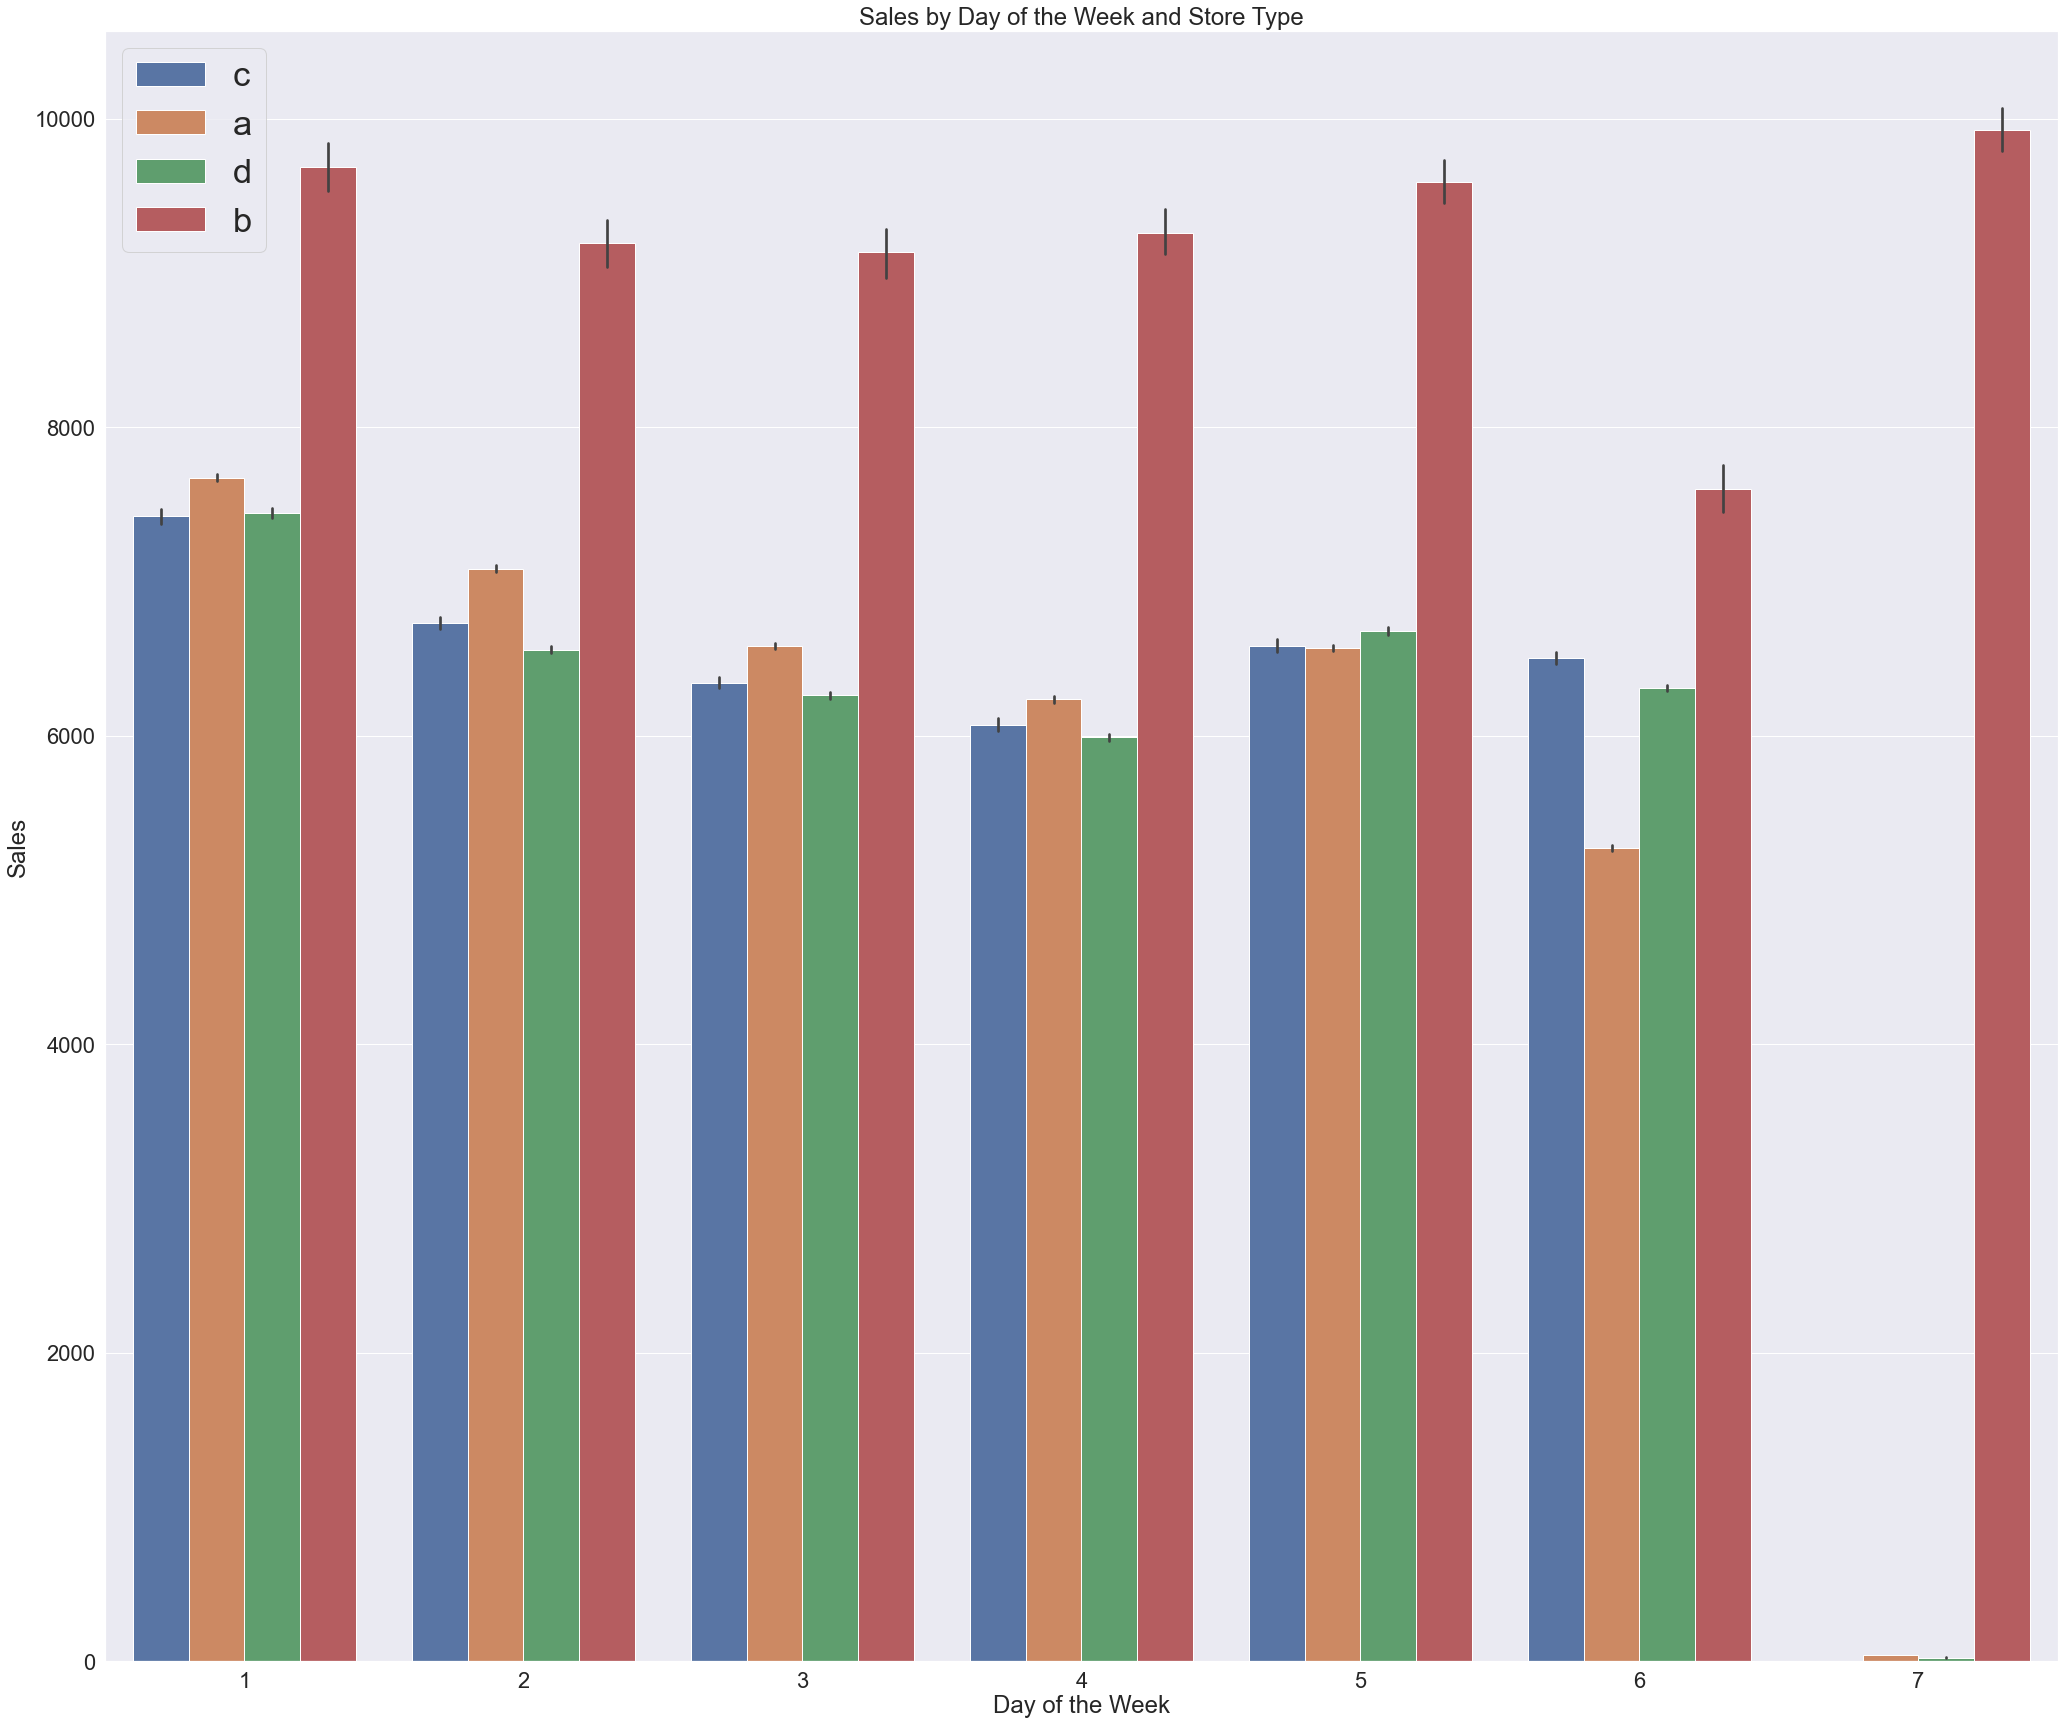

In [141]:
merged_data = pd.merge(train_data, store[['Store', 'StoreType']], on='Store', how='left')

sns.set(font_scale=2)

plt.figure(figsize=(35, 30))
sns.barplot(x="DayOfWeek", y="Sales", hue="StoreType", data=merged_data)
plt.xlabel("Day of the Week")
plt.ylabel("Sales")
plt.title("Sales by Day of the Week and Store Type")

# Adjust the legend size
plt.legend(fontsize='x-large')

plt.show()

<Figure size 864x504 with 0 Axes>

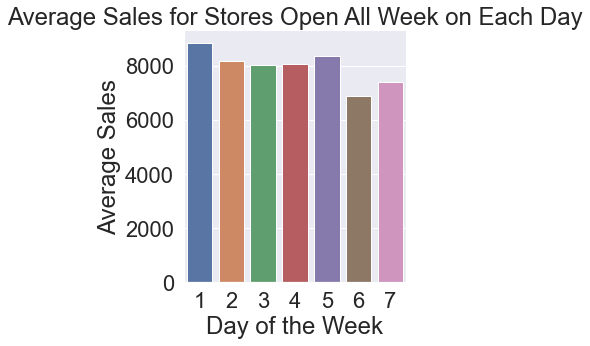

Stores That work all Week are: 33


In [142]:
open_stores = train_data[train_data.Open == 1]
each_day = open_stores[['Store', 'DayOfWeek']].groupby('Store').nunique()

all_week_stores = each_day[each_day.DayOfWeek == 7]
stores_id = all_week_stores.reset_index()['Store']

get_stores = open_stores[(open_stores.Store.isin(set(stores_id)))]
get_stores = get_stores[['Store', 'Sales', 'Customers', 'DayOfWeek']]

week_sales = get_stores.groupby('DayOfWeek').mean().reset_index()

plt.figure(figsize=(12, 7))
sns.catplot(data=week_sales, x="DayOfWeek", y="Sales", kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.title('Average Sales for Stores Open All Week on Each Day')
plt.show()

print(f'Stores That work all Week are: {all_week_stores.shape[0]}')

# **Check how the assortment type affects sales**

An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers. Also called a "product assortment strategy," it is a strategic tool that retailers use to manage and increase sales.

In [143]:
train_data.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'HolidayPeriod', 'Holiday',
       'Sales_Promo_Increase', 'Customers_Promo_Increase'],
      dtype='object')

In [144]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [145]:


# Merge 'train_data' with 'store' on 'Store' column
merged_data = train_data.merge(store[['Store', 'Assortment']], on='Store', how='inner')

# Select the columns you need ('Assortment' and 'Sales')
assort_data = merged_data[['Assortment', 'Sales']]

# Verify the number of unique values in each column
print(assort_data.nunique())

Assortment        3
Sales         13195
dtype: int64


this  gives us insights into the diversity of assortment types (3 unique types) and the number of distinct sales values (13,195 unique sales values) present in the dataset. It can be helpful for understanding the distribution and variety of assortment types and sales data in the dataset

In [146]:
print(assort_data['Sales'].describe())

count    1.017209e+06
mean     5.690812e+03
std      3.595807e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      1.404950e+04
Name: Sales, dtype: float64


In [147]:
mean_sales_by_assortment = assort_data.groupby('Assortment')['Sales'].mean()
print(mean_sales_by_assortment)

Assortment
a    5417.717468
b    8373.314866
c    5954.932500
Name: Sales, dtype: float64


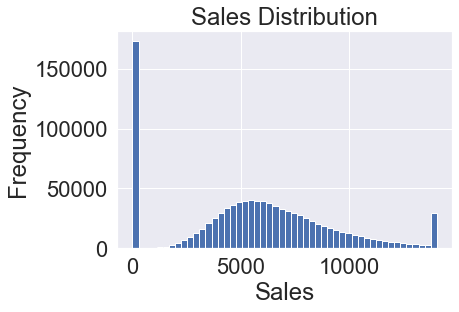

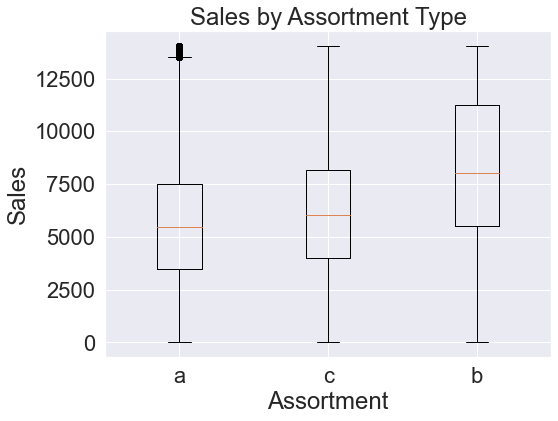

In [148]:
# Histogram of Sales distribution
plt.hist(assort_data['Sales'], bins=50)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution')
plt.show()

# Box plot of Sales by Assortment type
plt.figure(figsize=(8, 6))
plt.boxplot([assort_data[assort_data['Assortment'] == a]['Sales'] for a in assort_data['Assortment'].unique()],
            labels=assort_data['Assortment'].unique())
plt.xlabel('Assortment')
plt.ylabel('Sales')
plt.title('Sales by Assortment Type')
plt.show()

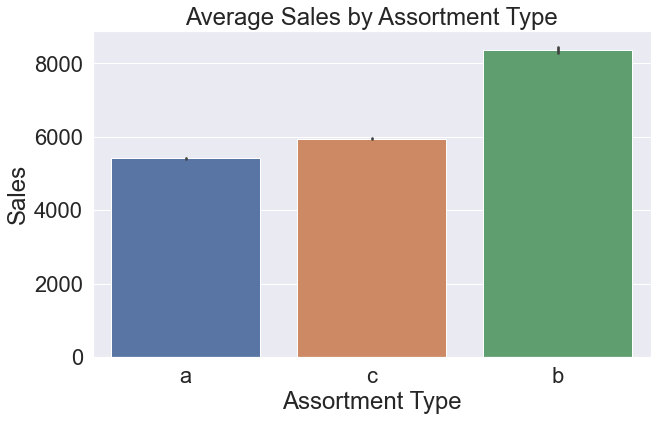

In [149]:

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x="Assortment", y="Sales", data=assort_data)
plt.xlabel("Assortment Type")
plt.ylabel("Sales")
plt.title("Average Sales by Assortment Type")
plt.show()

#  How distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?


In [150]:
distance_sales_data = pd.merge(train_data[['Store', 'Sales']], store[['Store', 'CompetitionDistance']], on='Store', how='left')

# Verify the number of unique values in each column
print(distance_sales_data.nunique())


Store                   1115
Sales                  13195
CompetitionDistance      655
dtype: int64


In [151]:
distance_sales_data

,Store,Sales,CompetitionDistance
0,1,5263.0,1270.0
1,2,6064.0,570.0
2,3,8314.0,14130.0
3,4,13995.0,620.0
4,5,4822.0,29910.0
...,...,...,...
1017204,1111,0.0,1900.0
1017205,1112,0.0,1880.0
1017206,1113,0.0,9260.0
1017207,1114,0.0,870.0


In [152]:
# Drop rows with missing values (if any)
distance_sales_data = distance_sales_data.dropna()

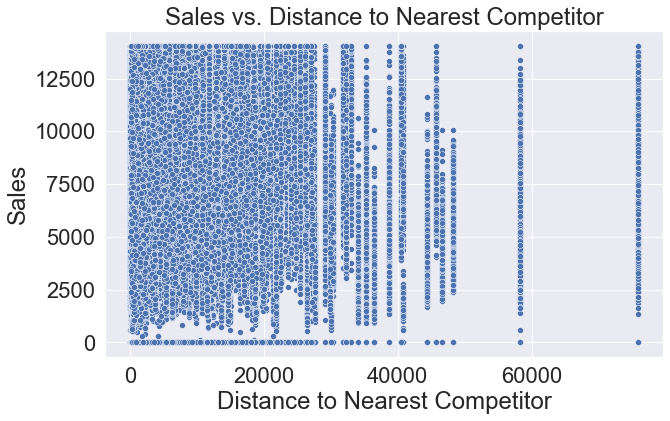

In [153]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.scatterplot(x="CompetitionDistance", y="Sales", data=distance_sales_data)
plt.xlabel("Distance to Nearest Competitor")
plt.ylabel("Sales")
plt.title("Sales vs. Distance to Nearest Competitor")
plt.show()

* As the scatter plot shows a negative relationship between distance to the nearest competitor and sales, it implies that stores located farther from competitors tend to have lower sales.

* Possible reasons include higher competition intensity near competitors, customer convenience leading to preference for nearby stores, and increased customer traffic in areas with clustered competitors.

* Additionally, regional market dynamics and store differentiation may also contribute to the observed trend.

* Businesses should carefully interpret this relationship and consider its implications when making decisions about store locations and marketing strategies

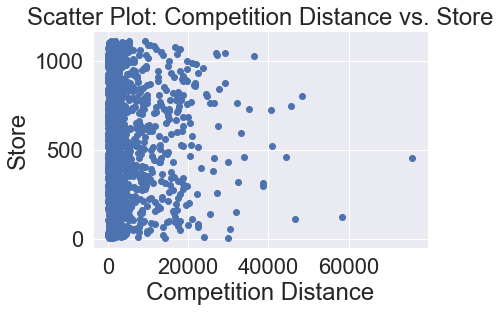

In [154]:
# Scatter plot to visualize the relationship
plt.scatter(store['CompetitionDistance'], store['Store'])
plt.xlabel('Competition Distance')
plt.ylabel('Store')
plt.title('Scatter Plot: Competition Distance vs. Store')
plt.show()

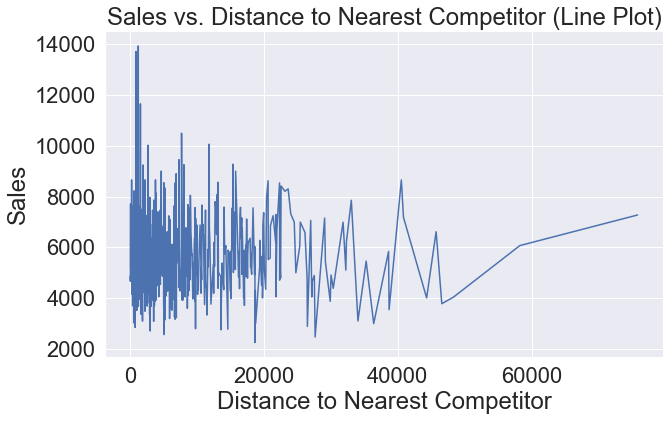

In [155]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="CompetitionDistance", y="Sales", data=distance_sales_data, ci=None)
plt.xlabel("Distance to Nearest Competitor")
plt.ylabel("Sales")
plt.title("Sales vs. Distance to Nearest Competitor (Line Plot)")
plt.show()







The less the competition distance the more the sales and as the competion distance increases the sales decreases.

# **How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance**

In [156]:
# Find stores with competitor distance information available before and after the new competitor opens/reopens
stores_with_distance_before = store[~store['CompetitionDistance'].isna()]['Store'].tolist()

# Calculate the total sales of these stores before the new competitor opens/reopens
total_sales_before = train_data[train_data['Store'].isin(stores_with_distance_before)]['Sales'].sum()

# Find stores with competitor distance information available after the new competitor opens/reopens
stores_with_distance_after = store[~store['CompetitionDistance'].isna()]['Store'].tolist()

# Calculate the total sales of these stores after the new competitor opens/reopens
total_sales_after = train_data[train_data['Store'].isin(stores_with_distance_after)]['Sales'].sum()

# Calculate the change in sales after the new competitor opens/reopens
sales_change = total_sales_after - total_sales_before

print(f"Total sales of stores before the new competitor opens/reopens: {total_sales_before:.2f}")
print(f"Total sales of stores after the new competitor opens/reopens: {total_sales_after:.2f}")
print(f"Change in sales after the new competitor opens/reopens: {sales_change:.2f}")


Total sales of stores before the new competitor opens/reopens: 5788745464.00
Total sales of stores after the new competitor opens/reopens: 5788745464.00
Change in sales after the new competitor opens/reopens: 0.00


The results show that the total sales of stores before and after the new competitor opens or reopens are exactly the same, resulting in a change of 0.00. This means that there is no apparent change in sales for the stores with competitor distance information available before and after the event.

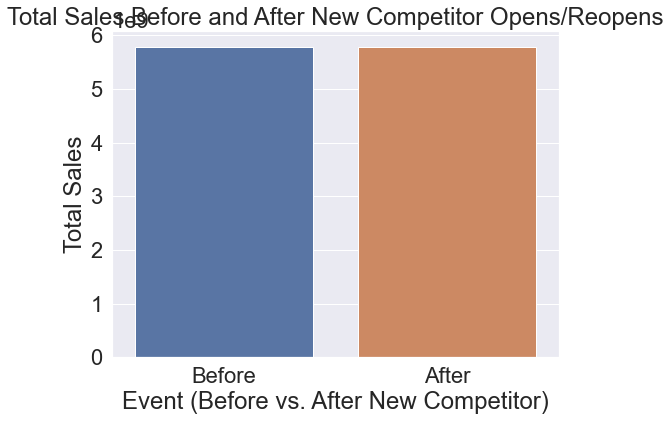

In [157]:
sales_data = pd.DataFrame({
    'Event': ['Before', 'After'],
    'Total Sales': [total_sales_before, total_sales_after]
})

# Plot the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Event', y='Total Sales', data=sales_data)
plt.xlabel("Event (Before vs. After New Competitor)")
plt.ylabel("Total Sales")
plt.title("Total Sales Before and After New Competitor Opens/Reopens")
plt.show()

The output shows an empty list, it means there are no stores with missing (NA) competitor distance values that later have non-missing values

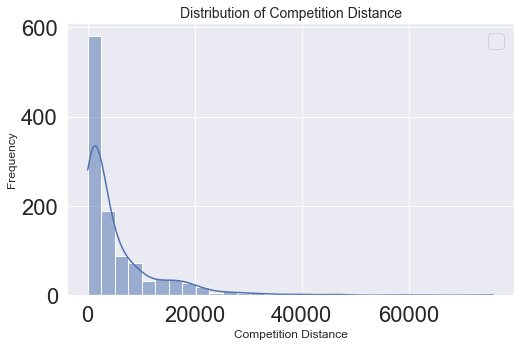

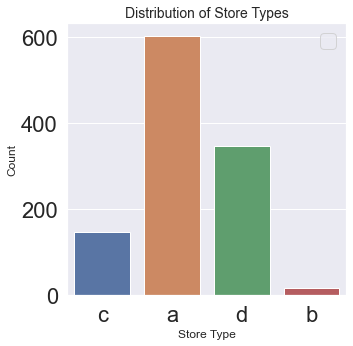

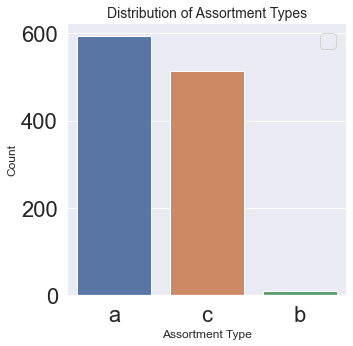

In [171]:
# Distribution of CompetitionDistance
plt.figure(figsize=(8, 5))  # Decrease the size of the figure
sns.histplot(data=store, x='CompetitionDistance', bins=30, kde=True)
plt.xlabel('Competition Distance', fontsize=12)  # Decrease the size of the x-axis label
plt.ylabel('Frequency', fontsize=12)  # Decrease the size of the y-axis label
plt.title('Distribution of Competition Distance', fontsize=14)  # Decrease the size of the title

# Decrease the size of the legend
plt.legend(fontsize='small')
plt.show()

# Store Types distribution
plt.figure(figsize=(5, 5))  # Decrease the size of the figure
sns.countplot(data=store, x='StoreType')
plt.xlabel('Store Type', fontsize=12)  # Decrease the size of the x-axis label
plt.ylabel('Count', fontsize=12)  # Decrease the size of the y-axis label
plt.title('Distribution of Store Types', fontsize=14)  # Decrease the size of the title

# Decrease the size of the legend
plt.legend(fontsize='small')
plt.show()

# Assortment Types distribution
plt.figure(figsize=(5, 5))  # Decrease the size of the figure
sns.countplot(data=store, x='Assortment')
plt.xlabel('Assortment Type', fontsize=12)  # Decrease the size of the x-axis label
plt.ylabel('Count', fontsize=12)  # Decrease the size of the y-axis label
plt.title('Distribution of Assortment Types', fontsize=14)  # Decrease the size of the title

# Decrease the size of the legend
plt.legend(fontsize='small')
plt.show()

<Figure size 2520x1080 with 0 Axes>

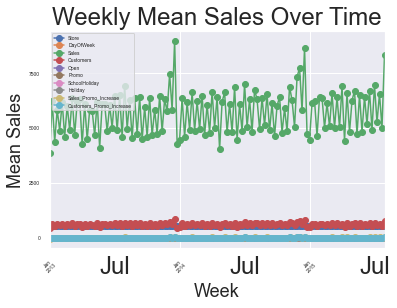

In [173]:
time_series_train_week = train_data.resample('W').mean()

# Plot the time series data
plt.figure(figsize=(35, 15))
time_series_train_week.plot(fontsize=24, marker='o', linestyle='-')

plt.xlabel("Week", fontsize=18)
plt.ylabel("Mean Sales", fontsize=18)
plt.title("Weekly Mean Sales Over Time", fontsize=24)
plt.xticks(fontsize=5, rotation=45)
plt.yticks(fontsize=5)

# Customize the legend
plt.legend(fontsize=5, loc='upper left')

plt.show()

<Figure size 2880x1080 with 0 Axes>

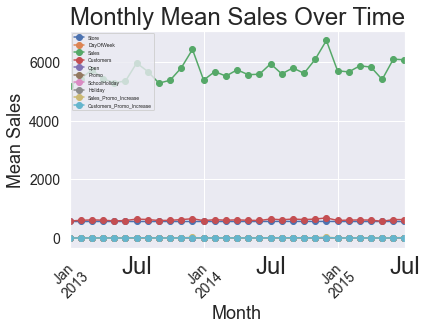

In [174]:
time_series_train_month = train_data.resample('M').mean()

# Plot the time series data with a larger aspect ratio
plt.figure(figsize=(40, 15))

# Plot the data and customize the legend
time_series_train_month.plot(fontsize=24, marker='o', linestyle='-')
plt.legend(fontsize=5, loc='upper left')

plt.xlabel("Month", fontsize=18)
plt.ylabel("Mean Sales", fontsize=18)
plt.title("Monthly Mean Sales Over Time", fontsize=24)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.show()

In [175]:



test_data.head()


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


# **1.2 Logging**

In [176]:
logger.debug('this is debug')

2023-08-31 13:39:13,843 - my_logger - DEBUG - this is debug


In [177]:
logger.info('this is info')

2023-08-31 13:39:14,418 - my_logger - INFO - this is info


In [178]:
logger.warning('this is warning')

2023-08-31 13:39:14,889 - my_logger - WARNING - this is warning


In [179]:
logger.error("This is error")

2023-08-31 13:39:15,384 - my_logger - ERROR - This is error


In [180]:
logger.critical('this is critical')

2023-08-31 13:39:15,737 - my_logger - CRITICAL - this is critical


In [181]:
# Logging messages
logger.debug("This is a debug message")
logger.info("This is an info message")
logger.warning("This is a warning message")
logger.error("This is an error message")
logger.critical("This is a critical message")

2023-08-31 13:39:16,084 - my_logger - DEBUG - This is a debug message
2023-08-31 13:39:16,085 - my_logger - INFO - This is an info message
2023-08-31 13:39:16,087 - my_logger - WARNING - This is a warning message
2023-08-31 13:39:16,088 - my_logger - ERROR - This is an error message
2023-08-31 13:39:16,090 - my_logger - CRITICAL - This is a critical message
